# Chapter 4 + Chapter 5 + Chapter 6

# Daily Data - Plots, Univariate modeling, Calculation of London Cocoa premium, VAR-DCC models, VAR results 

In [289]:
library(rugarch)
library(rmgarch)
library(moments)
library(forecast)
library(MTS)
library(vars)
library(xts)
library(stargazer)
library(tseries)
library(lubridate)
library(tidyverse)
options(repr.plot.width = 20)

# Dataset preparation

In [290]:
fr_d <- readRDS("fr_d.Rds")
fp_d <- readRDS("fp_d.Rds")
cr_d <- readRDS("cr_d.Rds")
cp_d <- readRDS("cp_d.Rds")
head(cr_d)
head(fr_d)
us_d <- cr_d[,1]
l_d <- cr_d[,2]

                     usc           lc
2007-07-06  0.0033026687  0.005272420
2007-07-09 -0.0108928380 -0.013233541
2007-07-10 -0.0378502241 -0.040784991
2007-07-11  0.0210431058  0.019240172
2007-07-12  0.0057943185  0.004526943
2007-07-13 -0.0009633912 -0.004526943

                  eurusd        gbpusd        chfusd        usdgbp       eurgbp
2007-07-06  2.240547e-03 -0.0004972527 -0.0003044418  0.0007037652  0.002659380
2007-07-09  7.337565e-05  0.0022605055  0.0012172115 -0.0025157246 -0.001993871
2007-07-10  8.584371e-03  0.0057647029  0.0115503355 -0.0056582954  0.002805051
2007-07-11 -7.274844e-05  0.0027838359 -0.0029504763 -0.0026379885 -0.002952903
2007-07-12  3.485969e-03 -0.0009845428  0.0028903495  0.0008124302  0.004573291
2007-07-13 -7.252421e-04  0.0019435396  0.0000000000 -0.0020323145 -0.003391083
                  chfgbp        ghsusd        ghsgbp
2007-07-06  0.0001273483 -0.0033264938 -2.614079e-03
2007-07-09 -0.0009873737  0.0040086898  1.236683e-03
2007-07-10  0.0059364761 -0.0002705906 -5.801912e-03
2007-07-11 -0.0057330414  0.0026887042  4.994937e-05
2007-07-12  0.0037670817  0.0027212691  3.716576e-03
2007-07-13 -0.0020261005 -0.0051426368 -7.210559e-03

In [291]:
p <- na.omit(merge(cp_d,fp_d))
head(p)
tail(p)

            usc   lc  eurusd  gbpusd  chfusd  usdgbp  eurgbp   chfgbp   ghsusd
2007-07-05 2116 1135 1.35975 2.01155 0.82130 0.49715 0.67595 0.408303 1.074838
2007-07-06 2123 1141 1.36280 2.01055 0.82105 0.49750 0.67775 0.408355 1.071268
2007-07-09 2100 1126 1.36290 2.01510 0.82205 0.49625 0.67640 0.407952 1.075571
2007-07-10 2022 1081 1.37465 2.02675 0.83160 0.49345 0.67830 0.410381 1.075280
2007-07-11 2065 1102 1.37455 2.03240 0.82915 0.49215 0.67630 0.408035 1.078175
2007-07-12 2077 1107 1.37935 2.03040 0.83155 0.49255 0.67940 0.409575 1.081113
              ghsgbp
2007-07-05 0.5343465
2007-07-06 0.5329515
2007-07-09 0.5336110
2007-07-10 0.5305240
2007-07-11 0.5305505
2007-07-12 0.5325260

             usc   lc  eurusd  gbpusd  chfusd  usdgbp eurgbp  chfgbp    ghsusd
2024-04-26 10594 8979 1.06940 1.24910 1.09385 0.80055 0.8561 0.87570 0.0735850
2024-04-29  8931 7678 1.07210 1.25630 1.09830 0.79600 0.8534 0.87425 0.0732610
2024-04-30  9283 7929 1.06655 1.24910 1.08765 0.80055 0.8538 0.87070 0.0731535
2024-05-01  8284 7250 1.07110 1.25270 1.09215 0.79830 0.8554 0.87190 0.0729935
2024-05-02  7563 6555 1.07270 1.25340 1.09820 0.79780 0.8555 0.87620 0.0727285
2024-05-03  8145 6887 1.07600 1.25465 1.10425 0.79705 0.8577 0.88010 0.0728340
              ghsgbp
2024-04-26 0.0589105
2024-04-29 0.0583150
2024-04-30 0.0585630
2024-05-01 0.0582690
2024-05-02 0.0580250
2024-05-03 0.0580515

In [292]:
d <- na.omit(merge(cr_d,fr_d))
colnames(d) <- c("US Cocoa","London Cocoa","EURUSD","GBPUSD","CHFUSD","USDGBP","EURGBP","CHFGBP","GHSUSD","GHSGBP")
str(d)
head(d)
tail(d)

An xts object on 2007-07-06 / 2024-05-03 containing: 
  Data:    double [4175, 10]
  Columns: US Cocoa, London Cocoa, EURUSD, GBPUSD, CHFUSD ... with 5 more columns
  Index:   Date [4175] (TZ: "UTC")
  xts Attributes:
    $ na.action       : 'omit' int [1:216] 37 42 100 101 122 123 124 128 142 162 ...
  ..- attr(*, "index")= num [1:216] 1.19e+09 1.19e+09 1.20e+09 1.20e+09 1.20e+09 ...
    $ ret_type        : chr "log"
    $ coredata_content: chr "logReturn"


                US Cocoa London Cocoa        EURUSD        GBPUSD        CHFUSD
2007-07-06  0.0033026687  0.005272420  2.240547e-03 -0.0004972527 -0.0003044418
2007-07-09 -0.0108928380 -0.013233541  7.337565e-05  0.0022605055  0.0012172115
2007-07-10 -0.0378502241 -0.040784991  8.584371e-03  0.0057647029  0.0115503355
2007-07-11  0.0210431058  0.019240172 -7.274844e-05  0.0027838359 -0.0029504763
2007-07-12  0.0057943185  0.004526943  3.485969e-03 -0.0009845428  0.0028903495
2007-07-13 -0.0009633912 -0.004526943 -7.252421e-04  0.0019435396  0.0000000000
                  USDGBP       EURGBP        CHFGBP        GHSUSD        GHSGBP
2007-07-06  0.0007037652  0.002659380  0.0001273483 -0.0033264938 -2.614079e-03
2007-07-09 -0.0025157246 -0.001993871 -0.0009873737  0.0040086898  1.236683e-03
2007-07-10 -0.0056582954  0.002805051  0.0059364761 -0.0002705906 -5.801912e-03
2007-07-11 -0.0026379885 -0.002952903 -0.0057330414  0.0026887042  4.994937e-05
2007-07-12  0.0008124302  0.004573291  0

              US Cocoa London Cocoa       EURUSD        GBPUSD       CHFUSD
2024-04-26 -0.01962863  -0.02951879 -0.003314121 -0.0018396326 -0.002191682
2024-04-29 -0.17075943  -0.15652942  0.002521598  0.0057476010  0.004059947
2024-04-30  0.03865640   0.03216783 -0.005190202 -0.0057476010 -0.009744124
2024-05-01 -0.11385883  -0.08952546  0.004257018  0.0028779299  0.004128825
2024-05-02 -0.09105801  -0.10077335  0.001492677  0.0005586369  0.005524245
2024-05-03  0.07413631   0.04940746  0.003071627  0.0009967904  0.005493896
                  USDGBP        EURGBP        CHFGBP       GHSUSD        GHSGBP
2024-04-26  0.0018128971 -0.0015173624 -0.0003996004 -0.003682821 -0.0018400829
2024-04-29 -0.0056998056 -0.0031588210 -0.0016571906 -0.004412793 -0.0101599929
2024-04-30  0.0056998056  0.0004686036 -0.0040688901 -0.001468434  0.0042437477
2024-05-01 -0.0028145248  0.0018722215  0.0013772526 -0.002189577 -0.0050328783
2024-05-02 -0.0006265272  0.0001168975  0.0049196369 -0.003637066 -0

# Return plots for daily data (Apendix A)

## Cocoa Futures contracts (Figure A.1)

In [293]:
head(cr_d)

                     usc           lc
2007-07-06  0.0033026687  0.005272420
2007-07-09 -0.0108928380 -0.013233541
2007-07-10 -0.0378502241 -0.040784991
2007-07-11  0.0210431058  0.019240172
2007-07-12  0.0057943185  0.004526943
2007-07-13 -0.0009633912 -0.004526943

In [294]:
pdf("us_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(cr_d[,1], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [295]:
pdf("l_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(cr_d[,2], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

## Forex USD-denominated Currency pairs returns (Figure A.3)

In [296]:
head(fr_d)

                  eurusd        gbpusd        chfusd        usdgbp       eurgbp
2007-07-06  2.240547e-03 -0.0004972527 -0.0003044418  0.0007037652  0.002659380
2007-07-09  7.337565e-05  0.0022605055  0.0012172115 -0.0025157246 -0.001993871
2007-07-10  8.584371e-03  0.0057647029  0.0115503355 -0.0056582954  0.002805051
2007-07-11 -7.274844e-05  0.0027838359 -0.0029504763 -0.0026379885 -0.002952903
2007-07-12  3.485969e-03 -0.0009845428  0.0028903495  0.0008124302  0.004573291
2007-07-13 -7.252421e-04  0.0019435396  0.0000000000 -0.0020323145 -0.003391083
                  chfgbp        ghsusd        ghsgbp
2007-07-06  0.0001273483 -0.0033264938 -2.614079e-03
2007-07-09 -0.0009873737  0.0040086898  1.236683e-03
2007-07-10  0.0059364761 -0.0002705906 -5.801912e-03
2007-07-11 -0.0057330414  0.0026887042  4.994937e-05
2007-07-12  0.0037670817  0.0027212691  3.716576e-03
2007-07-13 -0.0020261005 -0.0051426368 -7.210559e-03

In [297]:
pdf("eurusd_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_d[,1], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [298]:
pdf("gbpusd_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_d[,2], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [299]:
pdf("chfusd_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_d[,3], xaxt = "n", type = "l",xlab = NA,ylab = NA)  # 'xaxt' prevents x-axis plotting
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [300]:
pdf("ghsusd_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_d[,7], xaxt = "n", type = "l",xlab = NA,ylab = NA)  # 'xaxt' prevents x-axis plotting
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

## Forex GBP-denominated currency returns (FIgure A.5)

In [301]:
pdf("usdgbp_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_d[,4], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [302]:
pdf("eurgbp_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_d[,5], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [303]:
pdf("chfgbp_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_d[,6], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [304]:
pdf("ghsgbp_returns.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fr_d[,8], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

# Price plots for daily data (Section 5.2)

In [305]:
head(cp_d)

            usc   lc
2007-07-05 2116 1135
2007-07-06 2123 1141
2007-07-09 2100 1126
2007-07-10 2022 1081
2007-07-11 2065 1102
2007-07-12 2077 1107

In [306]:
head(fp_d)

            eurusd  gbpusd  chfusd  usdgbp  eurgbp   chfgbp   ghsusd    ghsgbp
2007-07-05 1.35975 2.01155 0.82130 0.49715 0.67595 0.408303 1.074838 0.5343465
2007-07-06 1.36280 2.01055 0.82105 0.49750 0.67775 0.408355 1.071268 0.5329515
2007-07-09 1.36290 2.01510 0.82205 0.49625 0.67640 0.407952 1.075571 0.5336110
2007-07-10 1.37465 2.02675 0.83160 0.49345 0.67830 0.410381 1.075280 0.5305240
2007-07-11 1.37455 2.03240 0.82915 0.49215 0.67630 0.408035 1.078175 0.5305505
2007-07-12 1.37935 2.03040 0.83155 0.49255 0.67940 0.409575 1.081113 0.5325260

## Cocoa Price Plots (Figure 5.1)

In [307]:
pdf("us_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(cp_d[,1], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [308]:
pdf("l_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(cp_d[,2], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

## Forex Price plots: USD-denominated (Figure 5.2)

In [309]:
pdf("eurusd_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fp_d[,1], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [310]:
pdf("gbpusd_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fp_d[,2], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [311]:
pdf("chfusd_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fp_d[,3], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [312]:
pdf("ghsusd_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fp_d[,7], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

## Forex Price plots: GBP-denominated (Figure 5.3)

In [313]:
pdf("usdgbp_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fp_d[,4], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [314]:
pdf("eurgbp_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fp_d[,5], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [315]:
pdf("chfgbp_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fp_d[,6], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [316]:
pdf("ghsgbp_price.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(fp_d[,8], xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

# Univariate GARCH modeling (Chapter 6, Section 6.1)

## London Cocoa

In [317]:
auto.arima(l_d)

Series: l_d 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1   mean
      0.0462  4e-04
s.e.  0.0154  2e-04

sigma^2 = 0.0002276:  log likelihood = 11586.44
AIC=-23166.87   AICc=-23166.87   BIC=-23147.86

In [318]:
l_spec_norm <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "norm")
l_fit_norm <- ugarchfit(data = l_d,spec = l_spec_norm)

In [319]:
l_spec_std <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "std")
l_fit_std <- ugarchfit(data = l_d,spec = l_spec_std)

In [320]:
l_cocoa_garch_inf <- data.frame(Model = c("norm","std"),AIC = c(infocriteria(l_fit_norm)["Akaike",],infocriteria(l_fit_std)["Akaike",]),
                                BIC = c(infocriteria(l_fit_norm)["Bayes",],infocriteria(l_fit_std)["Bayes",]),
                              log_lig = c(likelihood(l_fit_norm),likelihood(l_fit_std)))
l_cocoa_garch_inf

Model,AIC,BIC,log_lig
<chr>,<dbl>,<dbl>,<dbl>
norm,-5.742054,-5.735983,11990.54
std,-5.775143,-5.767554,12060.61


### Parameter Estimates for London Cocoa

In [321]:
l_garch_n <- data.frame("Parameters" = c("mu","omega","alpha1","beta1"),
                       "Coefficient" = c(l_fit_norm@fit$coef["mu"],l_fit_norm@fit$coef["omega"],
                            l_fit_norm@fit$coef["alpha1"],l_fit_norm@fit$coef["beta1"]),
                      "Std. Errors" = c(l_fit_norm@fit$se.coef[1],l_fit_norm@fit$se.coef[2],l_fit_norm@fit$se.coef[3],l_fit_norm@fit$se.coef[4]))
l_garch_n

,Parameters,Coefficient,Std..Errors
,<chr>,<dbl>,<dbl>
mu,mu,4.104288e-04,1.945889e-04
omega,omega,1.213155e-06,8.560892e-07
alpha1,alpha1,4.740615e-02,7.015426e-03
beta1,beta1,9.487454e-01,7.544268e-03


In [322]:
l_garch_t <- data.frame("Parameters" = c("mu","omega","alpha1","beta1","shape"),
                       "Coefficient" = c(l_fit_std@fit$coef["mu"],l_fit_std@fit$coef["omega"],
                            l_fit_std@fit$coef["alpha1"],l_fit_std@fit$coef["beta1"],l_fit_std@fit$coef["shape"]),
                      "Std. Errors" = c(l_fit_std@fit$se.coef[1],l_fit_std@fit$se.coef[2],l_fit_std@fit$se.coef[3],l_fit_std@fit$se.coef[4],l_fit_std@fit$se.coef[5]))
l_garch_t

,Parameters,Coefficient,Std..Errors
,<chr>,<dbl>,<dbl>
mu,mu,4.589161e-04,1.885545e-04
omega,omega,1.449187e-06,7.701005e-07
alpha1,alpha1,4.448221e-02,5.180781e-03
beta1,beta1,9.503690e-01,5.736780e-03
shape,shape,7.086331e+00,6.956032e-01


In [323]:
l_n <- rep(NA,4)
for(i in 1:4){
    l_n[i] = paste0(round(l_garch_n[i,2],4)," (",round(l_garch_n[i,3],4),")")
}

l_t <- rep(NA,5)
for(i in 1:5){
    l_t[i] = paste0(round(l_garch_t[i,2],4)," (",round(l_garch_t[i,3],4),")")
}

## US Cocoa

In [324]:
auto.arima(us_d)

Series: us_d 
ARIMA(0,0,0) with zero mean 

sigma^2 = 0.0003088:  log likelihood = 10948.78
AIC=-21895.56   AICc=-21895.56   BIC=-21889.23

In [325]:
us_spec_norm <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "norm")
us_fit_norm <- ugarchfit(data = us_d,spec = us_spec_norm,solver = "hybrid")

In [326]:
us_spec_std <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "std")
us_fit_std <- ugarchfit(data = us_d,spec = us_spec_std)

In [327]:
us_cocoa_garch_inf <- data.frame(Model = c("norm","std"),AIC = c(infocriteria(us_fit_norm)["Akaike",],infocriteria(us_fit_std)["Akaike",]),
                                 BIC = c(infocriteria(us_fit_norm)["Bayes",],infocriteria(us_fit_std)["Bayes",]),
                              log_lig = c(likelihood(us_fit_norm),likelihood(us_fit_std)))
us_cocoa_garch_inf

Model,AIC,BIC,log_lig
<chr>,<dbl>,<dbl>,<dbl>
norm,-5.411940,-5.405869,11301.42
std,-5.429397,-5.421808,11338.87


##### Based on the information criteria, we have decided for the student's t-distribution for both GARCH models (for depiction of conditional volatility), both likelihood value and information criteria and the value of likelihood show significant improvement when we use either std or sstd instead of norm

### Parameter estimates for the univariate GARCH(1,1) model for US Cocoa

In [328]:
us_garch_n <- data.frame("Parameters" = c("mu","omega","alpha1","beta1"),
                       "Coefficient" = c(us_fit_norm@fit$coef["mu"],us_fit_norm@fit$coef["omega"],
                            us_fit_norm@fit$coef["alpha1"],us_fit_norm@fit$coef["beta1"]),
                      "Std. Errors" = c(us_fit_norm@fit$se.coef[1],us_fit_norm@fit$se.coef[2],us_fit_norm@fit$se.coef[3],us_fit_norm@fit$se.coef[4]))
us_garch_n

,Parameters,Coefficient,Std..Errors
,<chr>,<dbl>,<dbl>
mu,mu,3.381740e-04,2.296899e-04
omega,omega,9.037192e-07,5.811821e-07
alpha1,alpha1,3.848175e-02,1.923354e-03
beta1,beta1,9.599352e-01,1.718723e-03


In [329]:
us_garch_t <- data.frame("Parameters" = c("mu","omega","alpha1","beta1","shape"),
                       "Coefficient" = c(us_fit_std@fit$coef["mu"],us_fit_std@fit$coef["omega"],
                            us_fit_std@fit$coef["alpha1"],us_fit_std@fit$coef["beta1"],us_fit_std@fit$coef["shape"]),
                      "Std. Errors" = c(us_fit_std@fit$se.coef[1],us_fit_std@fit$se.coef[2],us_fit_std@fit$se.coef[3],
                                        us_fit_std@fit$se.coef[4],us_fit_std@fit$se.coef[5]))
us_garch_t

,Parameters,Coefficient,Std..Errors
,<chr>,<dbl>,<dbl>
mu,mu,5.182031e-04,2.261372e-04
omega,omega,9.185577e-07,6.712749e-07
alpha1,alpha1,3.536692e-02,1.863508e-03
beta1,beta1,9.628102e-01,1.561702e-03
shape,shape,9.346949e+00,1.397883e+00


In [330]:
us_n <- rep(NA,4)
for(i in 1:4){
    us_n[i] = paste0(round(us_garch_n[i,2],4)," (",round(us_garch_n[i,3],4),")")
}

us_t <- rep(NA,5)
for(i in 1:5){
    us_t[i] = paste0(round(us_garch_t[i,2],4)," (",round(us_garch_t[i,3],4),")")
}
us_t

[1] "5e-04 (2e-04)"   "0 (0)"           "0.0354 (0.0019)" "0.9628 (0.0016)"
[5] "9.3469 (1.3979)"

## Summary for US and London Cocoa for normal and St-t distributed errors (Table 6.1 - Daily)

In [331]:
ug <- data.frame("Parameters" = c("mu","omega","alpha1","beta1","shape","AIC","BIC","lik"),"US Cocoa (norm)" = c(us_n,NA,round(infocriteria(us_fit_norm)["Akaike",],4),
                 round(infocriteria(us_fit_norm)["Bayes",],4),round(likelihood(us_fit_norm),4)),
                 "US Cocoa (Student t)" = c(us_t,round(infocriteria(us_fit_std)["Akaike",],4),round(infocriteria(us_fit_std)["Bayes",],4),round(likelihood(us_fit_std),4)),
                "London Cocoa (norm)" = c(l_n,NA,round(infocriteria(l_fit_norm)["Akaike",],4),round(infocriteria(l_fit_norm)["Bayes",],4),round(likelihood(l_fit_norm),4)),
                 "London Cocoa (Student t)" = c(l_t,round(infocriteria(l_fit_std)["Akaike",],4),round(infocriteria(l_fit_std)["Bayes",],4),round(likelihood(l_fit_std),4)))
ug

Parameters,US.Cocoa..norm.,US.Cocoa..Student.t.,London.Cocoa..norm.,London.Cocoa..Student.t.
<chr>,<chr>,<chr>,<chr>,<chr>
mu,3e-04 (2e-04),5e-04 (2e-04),4e-04 (2e-04),5e-04 (2e-04)
omega,0 (0),0 (0),0 (0),0 (0)
alpha1,0.0385 (0.0019),0.0354 (0.0019),0.0474 (0.007),0.0445 (0.0052)
beta1,0.9599 (0.0017),0.9628 (0.0016),0.9487 (0.0075),0.9504 (0.0057)
shape,NA,9.3469 (1.3979),NA,7.0863 (0.6956)
AIC,-5.4119,-5.4294,-5.7421,-5.7751
BIC,-5.4059,-5.4218,-5.736,-5.7676
lik,11301.4248,11338.8664,11990.5374,12060.611


## Plots of conditional volatilities (Figure 6.1)

In [332]:
pdf("l_sigma.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(sigma(l_fit_std), xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [333]:
pdf("us_sigma.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(sigma(us_fit_std), xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

## Auxilliary GBPUSD uGARCH model for explanatory ananalysis conducted in Section 6.2.1

In [334]:
head(fr_d)
tail(fr_d)

                  eurusd        gbpusd        chfusd        usdgbp       eurgbp
2007-07-06  2.240547e-03 -0.0004972527 -0.0003044418  0.0007037652  0.002659380
2007-07-09  7.337565e-05  0.0022605055  0.0012172115 -0.0025157246 -0.001993871
2007-07-10  8.584371e-03  0.0057647029  0.0115503355 -0.0056582954  0.002805051
2007-07-11 -7.274844e-05  0.0027838359 -0.0029504763 -0.0026379885 -0.002952903
2007-07-12  3.485969e-03 -0.0009845428  0.0028903495  0.0008124302  0.004573291
2007-07-13 -7.252421e-04  0.0019435396  0.0000000000 -0.0020323145 -0.003391083
                  chfgbp        ghsusd        ghsgbp
2007-07-06  0.0001273483 -0.0033264938 -2.614079e-03
2007-07-09 -0.0009873737  0.0040086898  1.236683e-03
2007-07-10  0.0059364761 -0.0002705906 -5.801912e-03
2007-07-11 -0.0057330414  0.0026887042  4.994937e-05
2007-07-12  0.0037670817  0.0027212691  3.716576e-03
2007-07-13 -0.0020261005 -0.0051426368 -7.210559e-03

                 eurusd        gbpusd       chfusd        usdgbp        eurgbp
2024-04-26 -0.003314121 -0.0018396326 -0.002191682  0.0018128971 -0.0015173624
2024-04-29  0.002521598  0.0057476010  0.004059947 -0.0056998056 -0.0031588210
2024-04-30 -0.005190202 -0.0057476010 -0.009744124  0.0056998056  0.0004686036
2024-05-01  0.004257018  0.0028779299  0.004128825 -0.0028145248  0.0018722215
2024-05-02  0.001492677  0.0005586369  0.005524245 -0.0006265272  0.0001168975
2024-05-03  0.003071627  0.0009967904  0.005493896 -0.0009405274  0.0025682947
                  chfgbp       ghsusd        ghsgbp
2024-04-26 -0.0003996004 -0.003682821 -0.0018400829
2024-04-29 -0.0016571906 -0.004412793 -0.0101599929
2024-04-30 -0.0040688901 -0.001468434  0.0042437477
2024-05-01  0.0013772526 -0.002189577 -0.0050328783
2024-05-02  0.0049196369 -0.003637066 -0.0041962674
2024-05-03  0.0044411620  0.001449549  0.0004565954

In [335]:
gbpusd_spec_norm <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "norm")
gbpusd_fit_norm <- ugarchfit(data = fr_d[,2],spec = gbpusd_spec_norm)

In [336]:
gbpusd_spec_std <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean = TRUE),variance.model = list(garchOrder = c(1,1),model = "sGARCH"),
                    distribution.model = "std")
gbpusd_fit_std <- ugarchfit(data = fr_d[,2],spec = gbpusd_spec_std)


In [337]:
gbpusd_fit_norm@fit$matcoef
gbpusd_fit_std@fit$matcoef

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-5.631906e-05,7.590896e-05,-0.741929,4.581303e-01
omega,5.236703e-07,4.862673e-07,1.076919,2.815166e-01
alpha1,7.294485e-02,1.210925e-02,6.023893,1.702708e-09
beta1,9.142682e-01,1.222217e-02,74.804071,0.000000e+00


,Estimate,Std. Error,t value,Pr(>|t|)
mu,-2.469743e-05,7.304786e-05,-0.3380993,0.73528834
omega,3.077442e-07,1.539466e-07,1.9990319,0.04560491
alpha1,5.024804e-02,3.908897e-03,12.8547879,0.00000000
beta1,9.415941e-01,3.817435e-03,246.6561952,0.00000000
shape,7.656914e+00,8.177162e-01,9.3637789,0.00000000


In [338]:
infocriteria(gbpusd_fit_norm)
infocriteria(gbpusd_fit_std)

,
Akaike,-7.562064
Bayes,-7.556245
Shibata,-7.562065
Hannan-Quinn,-7.560011


,
Akaike,-7.602003
Bayes,-7.594730
Shibata,-7.602005
Hannan-Quinn,-7.599437


# VAR-DCC-GARCH for weekly data (Section 6.2)

In [339]:
VARselect(cr_d)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-1.795536e+01,-1.795359e+01,-1.795223e+01,-1.795198e+01,-1.795099e+01,-1.795014e+01,-1.795026e+01,-1.794890e+01,-1.794835e+01,-1.794712e+01
HQ(n),-1.795213e+01,-1.794821e+01,-1.794470e+01,-1.794229e+01,-1.793915e+01,-1.793615e+01,-1.793412e+01,-1.793061e+01,-1.792790e+01,-1.792452e+01
SC(n),-1.794624e+01,-1.793838e+01,-1.793094e+01,-1.792460e+01,-1.791753e+01,-1.791059e+01,-1.790463e+01,-1.789719e+01,-1.789055e+01,-1.788324e+01
FPE(n),1.592521e-08,1.595341e-08,1.597520e-08,1.597922e-08,1.599505e-08,1.600866e-08,1.600669e-08,1.602844e-08,1.603732e-08,1.605707e-08


In [340]:
summary(VAR(cr_d,p=1))


VAR Estimation Results:
Endogenous variables: usc, lc 
Deterministic variables: const 
Sample size: 4174 
Log Likelihood: 25634.81 
Roots of the characteristic polynomial:
0.0621 0.04954
Call:
VAR(y = cr_d, p = 1)


Estimation results for equation usc: 
usc = usc.l1 + lc.l1 + const 

         Estimate Std. Error t value Pr(>|t|)   
usc.l1 -0.0804047  0.0325046  -2.474  0.01341 * 
lc.l1   0.1158541  0.0377888   3.066  0.00218 **
const   0.0002905  0.0002719   1.069  0.28535   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.01756 on 4171 degrees of freedom
Multiple R-Squared: 0.0023,	Adjusted R-squared: 0.001821 
F-statistic: 4.807 on 2 and 4171 DF,  p-value: 0.008215 


Estimation results for equation lc: 
lc = usc.l1 + lc.l1 + const 

         Estimate Std. Error t value Pr(>|t|)  
usc.l1 -0.0205289  0.0279348  -0.735   0.4625  
lc.l1   0.0678400  0.0324761   2.089   0.0368 *
const   0.0004146  0.0002337   1.774   0.0761 .
---
Signif. c

In [341]:
cocoa_var <- varxfit(cr_d,p=1)

##### Return spillover is significant from Lodnon to US cocoa on daily frequency

In [342]:
cocoa_var$Bcoef

,usc.l1,lc.l1,const
usc,-0.08040472,0.11585415,0.0002905429
lc,-0.02052888,0.06783996,0.0004145675


## VAR-DCC: norm + mvnorm

In [343]:
ugarch_spec_2 <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "norm")
spec_dcc_2 <- dccspec(uspec = multispec(replicate(ugarch_spec_2,n=2)),
                      model = "DCC",dccOrder = c(1,1),lag = 1,VAR = T,lag.criterion = c("AIC"),distribution = c("mvnorm"))
dcc_fit_2 <- dccfit(data = cr_d,spec = spec_dcc_2)
dcc_fit_2
dcc_fit_2@model$varcoef


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  15
[VAR GARCH DCC UncQ] : [6+6+2+1]
No. Series           :  2
No. Obs.             :  4175
Log-Likelihood       :  26298.52
Av.Log-Likelihood    :  6.3 

Optimal Parameters
-----------------------------------
              Estimate  Std. Error    t value Pr(>|t|)
[usc].omega   0.000001    0.000000    3.06747 0.002159
[usc].alpha1  0.038786    0.001604   24.17428 0.000000
[usc].beta1   0.959595    0.000924 1039.06570 0.000000
[lc].omega    0.000001    0.000002    0.63711 0.524056
[lc].alpha1   0.048042    0.014093    3.40891 0.000652
[lc].beta1    0.948019    0.015340   61.79923 0.000000
[Joint]dcca1  0.032504    0.010432    3.11582 0.001834
[Joint]dccb1  0.953806    0.016691   57.14540 0.000000

Information Criteria
---------------------
                    
Akaike       -12.591
Bayes       

,usc.l1,lc.l1,const
usc,-0.08040472,0.11585415,0.0002905429
lc,-0.02052888,0.06783996,0.0004145675


In [344]:
dcc_norm <- round(dcc_fit_2@mfit$matcoef,4)
dcc_norm
dcc_norm[,1]

,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,3.0675,0.0022
[usc].alpha1,0.0388,0.0016,24.1743,0.0000
[usc].beta1,0.9596,0.0009,1039.0657,0.0000
[lc].omega,0.0000,0.0000,0.6371,0.5241
[lc].alpha1,0.0480,0.0141,3.4089,0.0007
[lc].beta1,0.9480,0.0153,61.7992,0.0000
[Joint]dcca1,0.0325,0.0104,3.1158,0.0018
[Joint]dccb1,0.9538,0.0167,57.1454,0.0000


[usc].omega [usc].alpha1  [usc].beta1   [lc].omega  [lc].alpha1   [lc].beta1 
      0.0000       0.0388       0.9596       0.0000       0.0480       0.9480 
[Joint]dcca1 [Joint]dccb1 
      0.0325       0.9538

In [345]:
dcc_n <- rep(NA,8)
for(i in 1:8){
    dcc_n[i] = paste0(round(dcc_norm[i,1],4)," (",round(dcc_norm[i,2],4),")")
}
dcc_n

[1] "0 (0)"           "0.0388 (0.0016)" "0.9596 (9e-04)"  "0 (0)"          
[5] "0.048 (0.0141)"  "0.948 (0.0153)"  "0.0325 (0.0104)" "0.9538 (0.0167)"

## VAR-DCC: std + mvt

In [346]:
ugarch_spec_1 <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "std")
spec_dcc_1 <- dccspec(uspec = multispec(replicate(ugarch_spec_1,n=2)),
                      model = "DCC",dccOrder = c(1,1),lag = 1,VAR = T,lag.criterion = c("AIC"),distribution = c("mvt"))
dcc_fit_1 <- dccfit(data = cr_d,spec = spec_dcc_1)


In [347]:
dcc_fit_2


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  15
[VAR GARCH DCC UncQ] : [6+6+2+1]
No. Series           :  2
No. Obs.             :  4175
Log-Likelihood       :  26298.52
Av.Log-Likelihood    :  6.3 

Optimal Parameters
-----------------------------------
              Estimate  Std. Error    t value Pr(>|t|)
[usc].omega   0.000001    0.000000    3.06747 0.002159
[usc].alpha1  0.038786    0.001604   24.17428 0.000000
[usc].beta1   0.959595    0.000924 1039.06570 0.000000
[lc].omega    0.000001    0.000002    0.63711 0.524056
[lc].alpha1   0.048042    0.014093    3.40891 0.000652
[lc].beta1    0.948019    0.015340   61.79923 0.000000
[Joint]dcca1  0.032504    0.010432    3.11582 0.001834
[Joint]dccb1  0.953806    0.016691   57.14540 0.000000

Information Criteria
---------------------
                    
Akaike       -12.591
Bayes       

In [348]:
dcc_t <- round(dcc_fit_1@mfit$matcoef,4)
dcc_t

,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,2.2613,0.0237
[usc].alpha1,0.0361,0.0015,23.9469,0.0000
[usc].beta1,0.9622,0.0007,1426.3945,0.0000
[usc].shape,9.5474,1.3397,7.1264,0.0000
[lc].omega,0.0000,0.0000,1.7368,0.0824
[lc].alpha1,0.0456,0.0045,10.1101,0.0000
[lc].beta1,0.9490,0.0056,168.4873,0.0000
[lc].shape,7.0721,0.7109,9.9474,0.0000
[Joint]dcca1,0.0317,0.0066,4.8134,0.0000
[Joint]dccb1,0.9583,0.0109,87.9563,0.0000


In [349]:
params_dcc <- rownames(dcc_t)
dcc_st <- rep(NA,11)
for(i in 1:11){
    dcc_st[i] = paste0(round(dcc_t[i,1],4)," (",round(dcc_t[i,2],4),")")
}
dcc_st
params_dcc

[1] "0 (0)"           "0.0361 (0.0015)" "0.9622 (7e-04)"  "9.5474 (1.3397)"
 [5] "0 (0)"           "0.0456 (0.0045)" "0.949 (0.0056)"  "7.0721 (0.7109)"
 [9] "0.0317 (0.0066)" "0.9583 (0.0109)" "6.1845 (0.3107)"

[1] "[usc].omega"   "[usc].alpha1"  "[usc].beta1"   "[usc].shape"  
 [5] "[lc].omega"    "[lc].alpha1"   "[lc].beta1"    "[lc].shape"   
 [9] "[Joint]dcca1"  "[Joint]dccb1"  "[Joint]mshape"

## Table of estimates for daily DCC models for US Cocoa - London Cocoa (Table 6.2)

In [350]:
dcc_c_summary <- data.frame("Parameters" = c(params_dcc,"AIC","BIC","LogLik"),
                            "DCC(norm)"=c(dcc_n[1:3],NA,dcc_n[4:6],NA,dcc_n[7:8],NA,round(infocriteria(dcc_fit_2)[1],4),round(infocriteria(dcc_fit_2)[2],4),round(likelihood(dcc_fit_2),4)),
                            "DCC(t)" = c(dcc_st,round(infocriteria(dcc_fit_1)[1],4),round(infocriteria(dcc_fit_1)[2],4),round(likelihood(dcc_fit_1),4)))
dcc_c_summary

Parameters,DCC.norm.,DCC.t.
<chr>,<chr>,<chr>
[usc].omega,0 (0),0 (0)
[usc].alpha1,0.0388 (0.0016),0.0361 (0.0015)
[usc].beta1,0.9596 (9e-04),0.9622 (7e-04)
[usc].shape,NA,9.5474 (1.3397)
[lc].omega,0 (0),0 (0)
[lc].alpha1,0.048 (0.0141),0.0456 (0.0045)
[lc].beta1,0.948 (0.0153),0.949 (0.0056)
[lc].shape,NA,7.0721 (0.7109)
[Joint]dcca1,0.0325 (0.0104),0.0317 (0.0066)


## Plot of daily DCC for US Cocoa - London Cocoa (Fig 6.2)

In [351]:
cr_cor <- rcor(dcc_fit_1)
cocoa_cor <- xts(cr_cor[2,1,],order.by = index(cr_d))

In [352]:
which.min(cocoa_cor)
cocoa_cor[2231,]

[1] 2231

                [,1]
2016-06-28 0.1354049

In [353]:
which.max(cocoa_cor)
cocoa_cor[4175,]

[1] 4175

                [,1]
2024-05-03 0.9597531

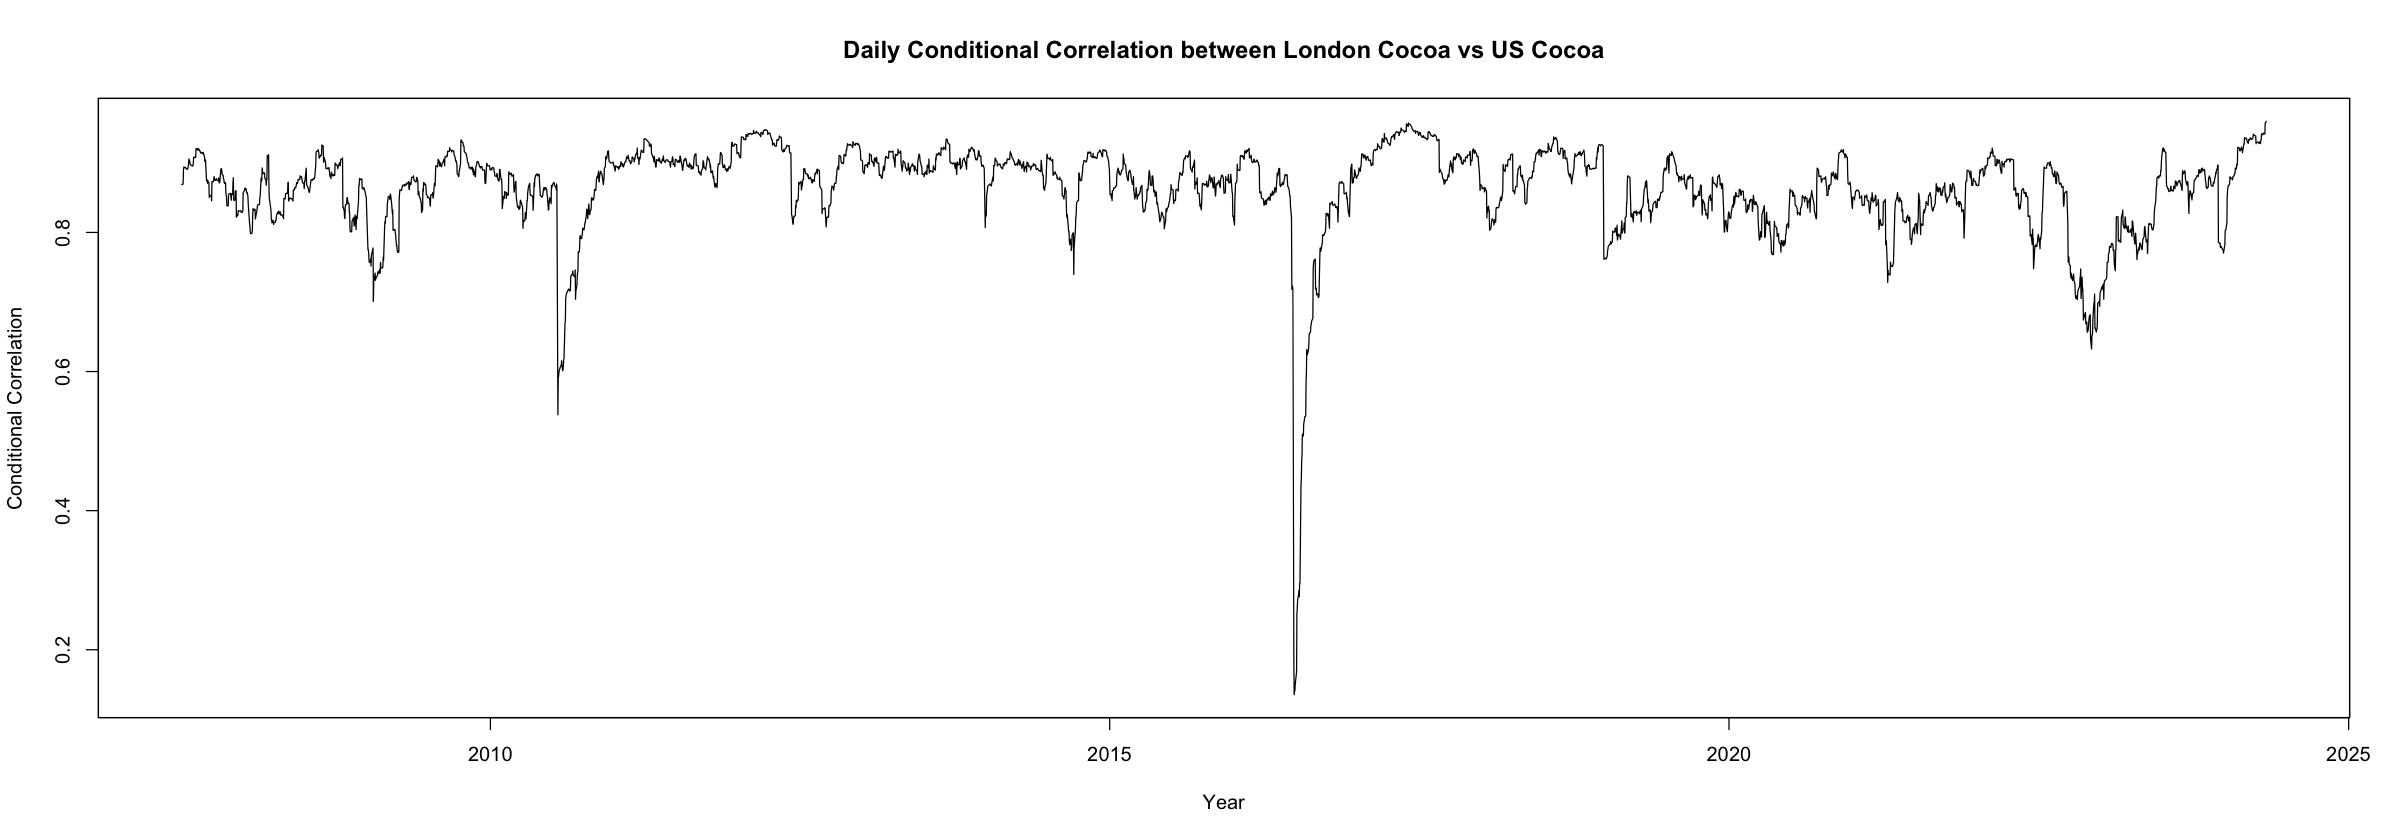

In [354]:
plot.zoo(cocoa_cor,type = "l",main = "Daily Conditional Correlation between London Cocoa vs US Cocoa",xlab = "Year",ylab = "Conditional Correlation")

In [355]:
pdf("cor_cocoa.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(cocoa_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

#### Where the notable minima and maxima of the conditional correlations?

In [356]:
cocoa_cor_first_half <- cocoa_cor["/2015"]
which.min(cocoa_cor_first_half)
cocoa_cor_first_half[751,]

[1] 751

                [,1]
2010-07-19 0.5378256

In [357]:
cocoa_cor_sec_half <- cocoa_cor["2016/"]
which.min(cocoa_cor_sec_half)
cocoa_cor_sec_half[122,]

[1] 122

                [,1]
2016-06-28 0.1354049

In [358]:
cocoa_cor_22_24 <- cocoa_cor["2022/"]
which.min(cocoa_cor_22_24)
cocoa_cor_22_24[226,]

[1] 226

                [,1]
2022-12-05 0.6324553

# US Cocoa - FOREX model VAR-DCC-GARCH (Section 6.2.2)

## Data prep

In [359]:
us_d <- na.omit(merge(cr_d[,1],fr_d[,c(1,2,3,7)]))
str(us_d)
head(us_d)
tail(us_d)

An xts object on 2007-07-06 / 2024-05-03 containing: 
  Data:    double [4175, 5]
  Columns: usc, eurusd, gbpusd, chfusd, ghsusd
  Index:   Date [4175] (TZ: "UTC")
  xts Attributes:
    $ na.action       : 'omit' int [1:216] 37 42 100 101 122 123 124 128 142 162 ...
  ..- attr(*, "index")= num [1:216] 1.19e+09 1.19e+09 1.20e+09 1.20e+09 1.20e+09 ...
    $ ret_type        : chr "log"
    $ coredata_content: chr "logReturn"


                     usc        eurusd        gbpusd        chfusd
2007-07-06  0.0033026687  2.240547e-03 -0.0004972527 -0.0003044418
2007-07-09 -0.0108928380  7.337565e-05  0.0022605055  0.0012172115
2007-07-10 -0.0378502241  8.584371e-03  0.0057647029  0.0115503355
2007-07-11  0.0210431058 -7.274844e-05  0.0027838359 -0.0029504763
2007-07-12  0.0057943185  3.485969e-03 -0.0009845428  0.0028903495
2007-07-13 -0.0009633912 -7.252421e-04  0.0019435396  0.0000000000
                  ghsusd
2007-07-06 -0.0033264938
2007-07-09  0.0040086898
2007-07-10 -0.0002705906
2007-07-11  0.0026887042
2007-07-12  0.0027212691
2007-07-13 -0.0051426368

                   usc       eurusd        gbpusd       chfusd       ghsusd
2024-04-26 -0.01962863 -0.003314121 -0.0018396326 -0.002191682 -0.003682821
2024-04-29 -0.17075943  0.002521598  0.0057476010  0.004059947 -0.004412793
2024-04-30  0.03865640 -0.005190202 -0.0057476010 -0.009744124 -0.001468434
2024-05-01 -0.11385883  0.004257018  0.0028779299  0.004128825 -0.002189577
2024-05-02 -0.09105801  0.001492677  0.0005586369  0.005524245 -0.003637066
2024-05-03  0.07413631  0.003071627  0.0009967904  0.005493896  0.001449549

In [360]:
VARselect(us_d)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-4.884882e+01,-4.884612e+01,-4.885166e+01,-4.885022e+01,-4.884831e+01,-4.884680e+01,-4.884350e+01,-4.883632e+01,-4.883531e+01,-4.883259e+01
HQ(n),-4.883268e+01,-4.881653e+01,-4.880862e+01,-4.879373e+01,-4.877837e+01,-4.876341e+01,-4.874665e+01,-4.872603e+01,-4.871157e+01,-4.869540e+01
SC(n),-4.880320e+01,-4.876247e+01,-4.872999e+01,-4.869053e+01,-4.865060e+01,-4.861106e+01,-4.856974e+01,-4.852454e+01,-4.848551e+01,-4.844476e+01
FPE(n),6.098530e-22,6.115050e-22,6.081280e-22,6.090029e-22,6.101643e-22,6.110908e-22,6.131127e-22,6.175267e-22,6.181547e-22,6.198397e-22


In [361]:
us_var <- varxfit(us_d,p=3)
us_var$Bcoef
t(us_var$pstat)

,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,usc.l2,eurusd.l2,gbpusd.l2,chfusd.l2,ghsusd.l2,usc.l3,eurusd.l3,gbpusd.l3,chfusd.l3,ghsusd.l3,const
usc,-0.011393381,0.184516004,0.1110674995,-0.06928703,-0.007192573,0.007881548,-0.02869948,-0.019829076,0.021869819,-0.016215400,0.016331718,0.03480795,-0.003130899,-0.060371851,0.010209831,3.413280e-04
eurusd,0.006609744,0.020433167,-0.0000817252,-0.02766142,-0.014131869,0.004070330,-0.02636552,0.009593350,0.017988134,-0.005419436,0.007503035,-0.05019144,0.003547979,0.020420067,0.009433512,-6.710067e-05
gbpusd,0.002852750,-0.003512483,0.0500666096,-0.02361055,-0.012434899,0.006637993,0.02122512,-0.027232763,-0.001765819,-0.011812787,0.003849991,-0.02995658,-0.011467891,0.006171107,-0.006863554,-1.090067e-04
chfusd,0.004657960,0.005071119,0.0321271757,-0.01421283,-0.020918536,0.005228688,-0.01289508,0.006677269,0.017206940,0.000705971,0.005142870,-0.04479458,0.008442872,0.009755963,0.007912308,7.056898e-05
ghsusd,0.005228210,-0.007672967,0.0508435108,-0.01278542,-0.113412999,-0.002253356,0.02901969,-0.027205413,-0.027161817,0.090117598,0.004123156,-0.05552592,0.027789621,0.014464915,0.114033701,-5.512080e-04


,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,usc.l2,eurusd.l2,gbpusd.l2,chfusd.l2,ghsusd.l2,usc.l3,eurusd.l3,gbpusd.l3,chfusd.l3,ghsusd.l3,const
usc,0.4771913,0.01087905,0.04833842,0.2052310,7.878456e-01,0.6242430,0.6921876,0.7248572,0.6893704,5.451386e-01,0.3117060,0.63093184,0.9556649,0.2695954,7.024855e-01,0.2122929352
eurusd,0.2154962,0.39698993,0.99651846,0.1287613,1.122647e-01,0.4473628,0.2746732,0.6090287,0.3234188,5.436010e-01,0.1627319,0.03746508,0.8499173,0.2620499,2.891357e-01,0.4614465079
gbpusd,0.6137523,0.89065791,0.01160621,0.2208926,1.870460e-01,0.2420246,0.4063770,0.1704314,0.9270779,2.113068e-01,0.4988525,0.24099913,0.5636257,0.7489544,4.665060e-01,0.2586429544
chfusd,0.4450893,0.85408651,0.13343589,0.4947199,3.972461e-02,0.3931517,0.6402077,0.7554619,0.4085912,9.448144e-01,0.4025358,0.10425408,0.6936275,0.6392208,4.366685e-01,0.4980167633
ghsusd,0.5715276,0.85425712,0.11693647,0.6851258,1.831868e-13,0.8080607,0.4874492,0.4022244,0.3891770,5.448397e-09,0.6577474,0.18373647,0.3920281,0.6463582,1.361133e-13,0.0004760219


## Normal VAR-DCC model for US Cocoa and USD-denominated pairs 

In [362]:
ugarch_spec_us_n <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "norm")
spec_dcc_us_n <- dccspec(uspec = multispec(replicate(ugarch_spec_us_n,n=5)),
                      model = "DCC",dccOrder = c(1,1),lag = 3,VAR = T,lag.criterion = c("AIC"),distribution = c("mvnorm"))
dcc_fit_us_n <- dccfit(data = us_d,spec = spec_dcc_us_n)
dcc_fit_us_n


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  107
[VAR GARCH DCC UncQ] : [80+15+2+10]
No. Series           :  5
No. Obs.             :  4175
Log-Likelihood       :  75892.24
Av.Log-Likelihood    :  18.18 

Optimal Parameters
-----------------------------------
                 Estimate  Std. Error    t value Pr(>|t|)
[usc].omega      0.000001    0.000000 3.1667e+00 0.001542
[usc].alpha1     0.038335    0.001573 2.4372e+01 0.000000
[usc].beta1      0.960029    0.000890 1.0781e+03 0.000000
[eurusd].omega   0.000000    0.000000 7.6478e-01 0.444404
[eurusd].alpha1  0.039865    0.002165 1.8414e+01 0.000000
[eurusd].beta1   0.957456    0.001438 6.6579e+02 0.000000
[gbpusd].omega   0.000001    0.000002 2.1139e-01 0.832585
[gbpusd].alpha1  0.071171    0.050955 1.3967e+00 0.162489
[gbpusd].beta1   0.916526    0.053224 1.7220e+01 0.000000
[chfusd

In [363]:
dcc_us_norm <- round(dcc_fit_us_n@mfit$matcoef,4)
dcc_us_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,3.1667,0.0015
[usc].alpha1,0.0383,0.0016,24.3722,0.0000
[usc].beta1,0.9600,0.0009,1078.1201,0.0000
[eurusd].omega,0.0000,0.0000,0.7648,0.4444
[eurusd].alpha1,0.0399,0.0022,18.4136,0.0000
[eurusd].beta1,0.9575,0.0014,665.7935,0.0000
[gbpusd].omega,0.0000,0.0000,0.2114,0.8326
[gbpusd].alpha1,0.0712,0.0510,1.3967,0.1625
[gbpusd].beta1,0.9165,0.0532,17.2201,0.0000
[chfusd].omega,0.0000,0.0016,0.0000,1.0000


In [364]:
dcc_us_n <- rep(NA,17)
for(i in 1:17){
    dcc_us_n[i] = paste0(round(dcc_us_norm[i,1],4)," (",round(dcc_us_norm[i,2],4),")")
}
dcc_us_n

[1] "0 (0)"           "0.0383 (0.0016)" "0.96 (9e-04)"    "0 (0)"          
 [5] "0.0399 (0.0022)" "0.9575 (0.0014)" "0 (0)"           "0.0712 (0.051)" 
 [9] "0.9165 (0.0532)" "0 (0.0016)"      "0.066 (0.3804)"  "0.9228 (9.2182)"
[13] "0 (0)"           "0.1483 (0.0178)" "0.8507 (0.0175)" "0.0162 (0.1913)"
[17] "0.7652 (4.0379)"

In [365]:
dcc_fit_us_n@model$varcoef

,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,usc.l2,eurusd.l2,gbpusd.l2,chfusd.l2,ghsusd.l2,usc.l3,eurusd.l3,gbpusd.l3,chfusd.l3,ghsusd.l3,const
usc,-0.011393381,0.184516004,0.1110674995,-0.06928703,-0.007192573,0.007881548,-0.02869948,-0.019829076,0.021869819,-0.016215400,0.016331718,0.03480795,-0.003130899,-0.060371851,0.010209831,3.413280e-04
eurusd,0.006609744,0.020433167,-0.0000817252,-0.02766142,-0.014131869,0.004070330,-0.02636552,0.009593350,0.017988134,-0.005419436,0.007503035,-0.05019144,0.003547979,0.020420067,0.009433512,-6.710067e-05
gbpusd,0.002852750,-0.003512483,0.0500666096,-0.02361055,-0.012434899,0.006637993,0.02122512,-0.027232763,-0.001765819,-0.011812787,0.003849991,-0.02995658,-0.011467891,0.006171107,-0.006863554,-1.090067e-04
chfusd,0.004657960,0.005071119,0.0321271757,-0.01421283,-0.020918536,0.005228688,-0.01289508,0.006677269,0.017206940,0.000705971,0.005142870,-0.04479458,0.008442872,0.009755963,0.007912308,7.056898e-05
ghsusd,0.005228210,-0.007672967,0.0508435108,-0.01278542,-0.113412999,-0.002253356,0.02901969,-0.027205413,-0.027161817,0.090117598,0.004123156,-0.05552592,0.027789621,0.014464915,0.114033701,-5.512080e-04


## St-t VAR-DCC model for US Cocoa and USD-denominated pairs

In [366]:
ugarch_spec_us_t <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "std")
spec_dcc_us_t <- dccspec(uspec = multispec(replicate(ugarch_spec_us_t,n=5)),
                      model = "DCC",dccOrder = c(1,1),lag = 3,VAR = T,lag.criterion = c("AIC"),distribution = c("mvt"))
dcc_fit_us_t <- dccfit(data = us_d,spec = spec_dcc_us_t)
dcc_fit_us_t


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvt
Model                :  DCC(1,1)
No. Parameters       :  113
[VAR GARCH DCC UncQ] : [80+20+3+10]
No. Series           :  5
No. Obs.             :  4175
Log-Likelihood       :  78363.13
Av.Log-Likelihood    :  18.77 

Optimal Parameters
-----------------------------------
                 Estimate  Std. Error    t value Pr(>|t|)
[usc].omega      0.000001    0.000000    2.07934 0.037586
[usc].alpha1     0.035337    0.001465   24.11369 0.000000
[usc].beta1      0.962976    0.000690 1395.05930 0.000000
[usc].shape      9.336473    1.423609    6.55831 0.000000
[eurusd].omega   0.000000    0.000000    0.34644 0.729015
[eurusd].alpha1  0.040765    0.002917   13.97522 0.000000
[eurusd].beta1   0.957439    0.001765  542.50360 0.000000
[eurusd].shape  10.989105    2.524072    4.35372 0.000013
[gbpusd].omega   0.000000    0.000000    1.15991 0.246084
[gbpusd].a

In [367]:
dcc_us_t <- round(dcc_fit_us_t@mfit$matcoef,4)
dcc_us_t
dcc_us_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,2.0793,0.0376
[usc].alpha1,0.0353,0.0015,24.1137,0.0000
[usc].beta1,0.9630,0.0007,1395.0593,0.0000
[usc].shape,9.3365,1.4236,6.5583,0.0000
[eurusd].omega,0.0000,0.0000,0.3464,0.7290
[eurusd].alpha1,0.0408,0.0029,13.9752,0.0000
[eurusd].beta1,0.9574,0.0018,542.5036,0.0000
[eurusd].shape,10.9891,2.5241,4.3537,0.0000
[gbpusd].omega,0.0000,0.0000,1.1599,0.2461
[gbpusd].alpha1,0.0464,0.0036,12.9372,0.0000


,Estimate,Std. Error,t value,Pr(>|t|)
[usc].omega,0.0000,0.0000,3.1667,0.0015
[usc].alpha1,0.0383,0.0016,24.3722,0.0000
[usc].beta1,0.9600,0.0009,1078.1201,0.0000
[eurusd].omega,0.0000,0.0000,0.7648,0.4444
[eurusd].alpha1,0.0399,0.0022,18.4136,0.0000
[eurusd].beta1,0.9575,0.0014,665.7935,0.0000
[gbpusd].omega,0.0000,0.0000,0.2114,0.8326
[gbpusd].alpha1,0.0712,0.0510,1.3967,0.1625
[gbpusd].beta1,0.9165,0.0532,17.2201,0.0000
[chfusd].omega,0.0000,0.0016,0.0000,1.0000


In [368]:
dcc_us_n

[1] "0 (0)"           "0.0383 (0.0016)" "0.96 (9e-04)"    "0 (0)"          
 [5] "0.0399 (0.0022)" "0.9575 (0.0014)" "0 (0)"           "0.0712 (0.051)" 
 [9] "0.9165 (0.0532)" "0 (0.0016)"      "0.066 (0.3804)"  "0.9228 (9.2182)"
[13] "0 (0)"           "0.1483 (0.0178)" "0.8507 (0.0175)" "0.0162 (0.1913)"
[17] "0.7652 (4.0379)"

In [369]:
dcc_us_std <- rep(NA,23)
for(i in 1:23){
    dcc_us_std[i] = paste0(round(dcc_us_t[i,1],4)," (",round(dcc_us_t[i,2],4),")")
}
dcc_us_std
params_us <- rownames(dcc_us_t)
params_us

[1] "0 (0)"            "0.0353 (0.0015)"  "0.963 (7e-04)"    "9.3365 (1.4236)" 
 [5] "0 (0)"            "0.0408 (0.0029)"  "0.9574 (0.0018)"  "10.9891 (2.5241)"
 [9] "0 (0)"            "0.0464 (0.0036)"  "0.9462 (0.0043)"  "8.0254 (0.9863)" 
[13] "0 (0)"            "0.0408 (0.0042)"  "0.9503 (0.004)"   "7.0451 (1.1607)" 
[17] "0 (0)"            "0.2878 (0.0339)"  "0.7112 (0.0447)"  "3.0689 (0.0815)" 
[21] "0.026 (0.0015)"   "0.9731 (0.0014)"  "8.0382 (0.4592)"

[1] "[usc].omega"     "[usc].alpha1"    "[usc].beta1"     "[usc].shape"    
 [5] "[eurusd].omega"  "[eurusd].alpha1" "[eurusd].beta1"  "[eurusd].shape" 
 [9] "[gbpusd].omega"  "[gbpusd].alpha1" "[gbpusd].beta1"  "[gbpusd].shape" 
[13] "[chfusd].omega"  "[chfusd].alpha1" "[chfusd].beta1"  "[chfusd].shape" 
[17] "[ghsusd].omega"  "[ghsusd].alpha1" "[ghsusd].beta1"  "[ghsusd].shape" 
[21] "[Joint]dcca1"    "[Joint]dccb1"    "[Joint]mshape"

In [370]:
infocriteria(dcc_fit_us_t)
likelihood(dcc_fit_us_t)

,
Akaike,-37.48509
Bayes,-37.31358
Shibata,-37.48651
Hannan-Quinn,-37.42443


[1] 78363.13

## Table summarizing the results of DCC model for USD-denominated assets (Table 6.4)

In [371]:
dcc_us_summary <- data.frame("Parameters" = c(params_us,"AIC","BIC","LogLik"),"DCC(norm)"=c(dcc_us_n[1:3],NA,dcc_us_n[4:6],NA,dcc_us_n[7:9],NA,dcc_us_n[10:12],NA,
                            dcc_us_n[13:15],NA,dcc_us_n[16:17],NA,round(infocriteria(dcc_fit_us_n)[1],4),round(infocriteria(dcc_fit_us_n)[2],4),round(likelihood(dcc_fit_us_n),4)),
                             "DCC(t)" = c(dcc_us_std,round(infocriteria(dcc_fit_us_t)[1],4),round(infocriteria(dcc_fit_us_t)[2],4),round(likelihood(dcc_fit_us_t),4)))
dcc_us_summary

Parameters,DCC.norm.,DCC.t.
<chr>,<chr>,<chr>
[usc].omega,0 (0),0 (0)
[usc].alpha1,0.0383 (0.0016),0.0353 (0.0015)
[usc].beta1,0.96 (9e-04),0.963 (7e-04)
[usc].shape,NA,9.3365 (1.4236)
[eurusd].omega,0 (0),0 (0)
[eurusd].alpha1,0.0399 (0.0022),0.0408 (0.0029)
[eurusd].beta1,0.9575 (0.0014),0.9574 (0.0018)
[eurusd].shape,NA,10.9891 (2.5241)
[gbpusd].omega,0 (0),0 (0)


## Plots of conditional correlations of USD-denominated currency pairs and US Cocoa (Figure 6.3)

In [372]:
us_cor <- rcor(dcc_fit_us_t)
us_eur_cor <- xts(us_cor[2,1,],order.by = index(us_d))
us_gbp_cor <- xts(us_cor[3,1,],order.by = index(us_d))
us_chf_cor <- xts(us_cor[4,1,],order.by = index(us_d))
us_ghs_cor <- xts(us_cor[5,1,],order.by = index(us_d))

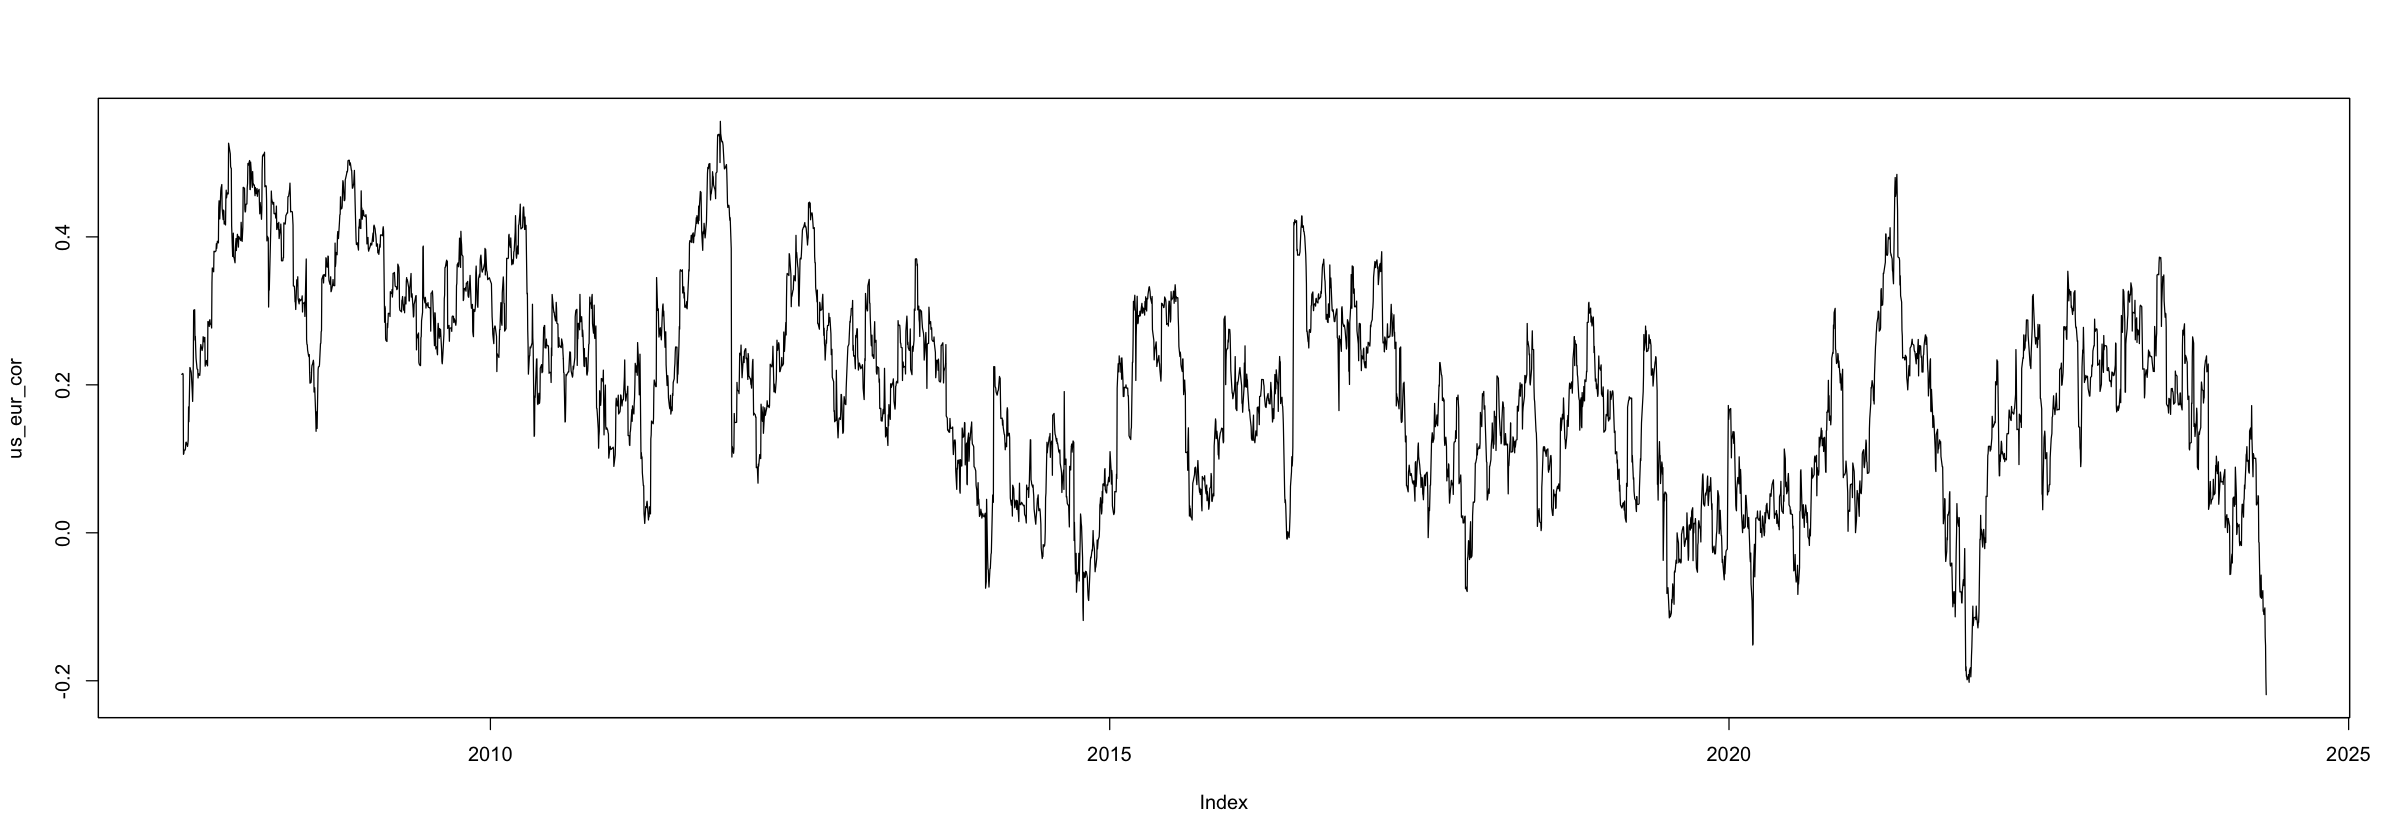

In [373]:
plot.zoo(us_eur_cor)

In [374]:
pdf("us_eur.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(us_eur_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

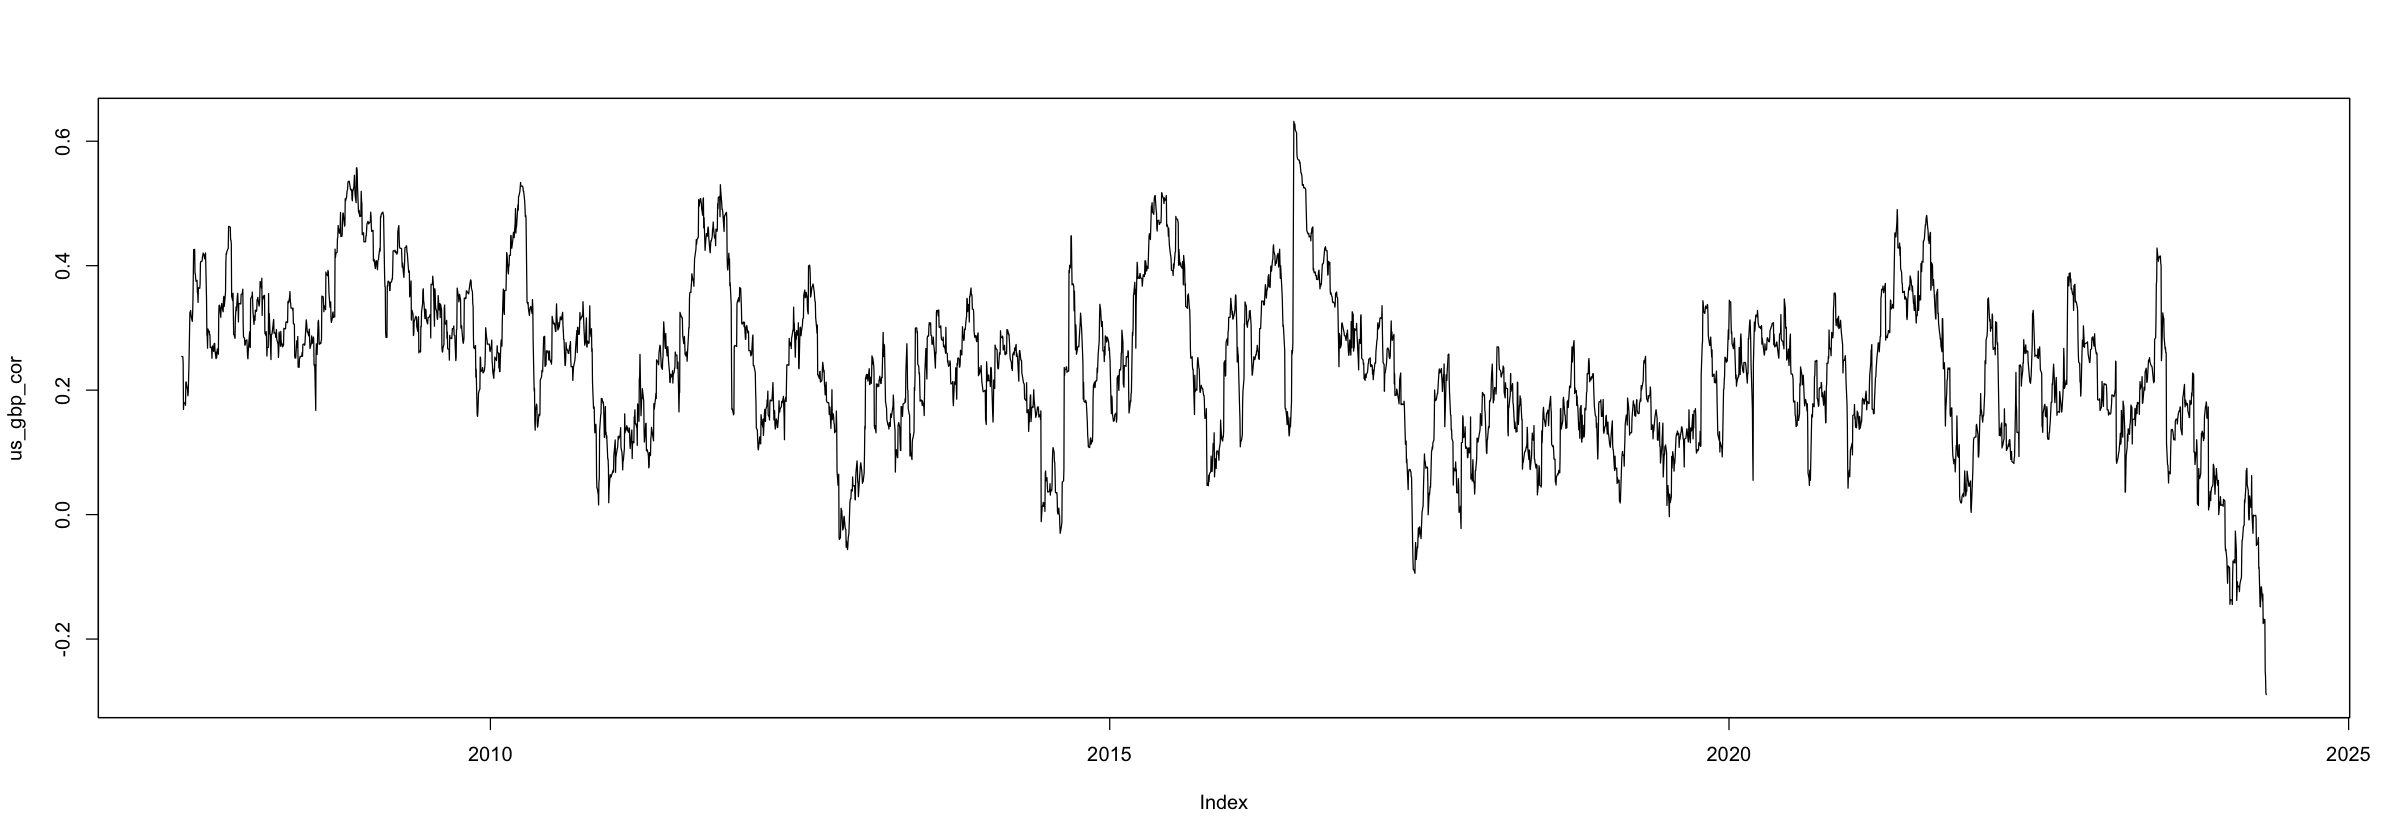

In [375]:
plot.zoo(us_gbp_cor)

In [376]:
pdf("us_gbp.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(us_gbp_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

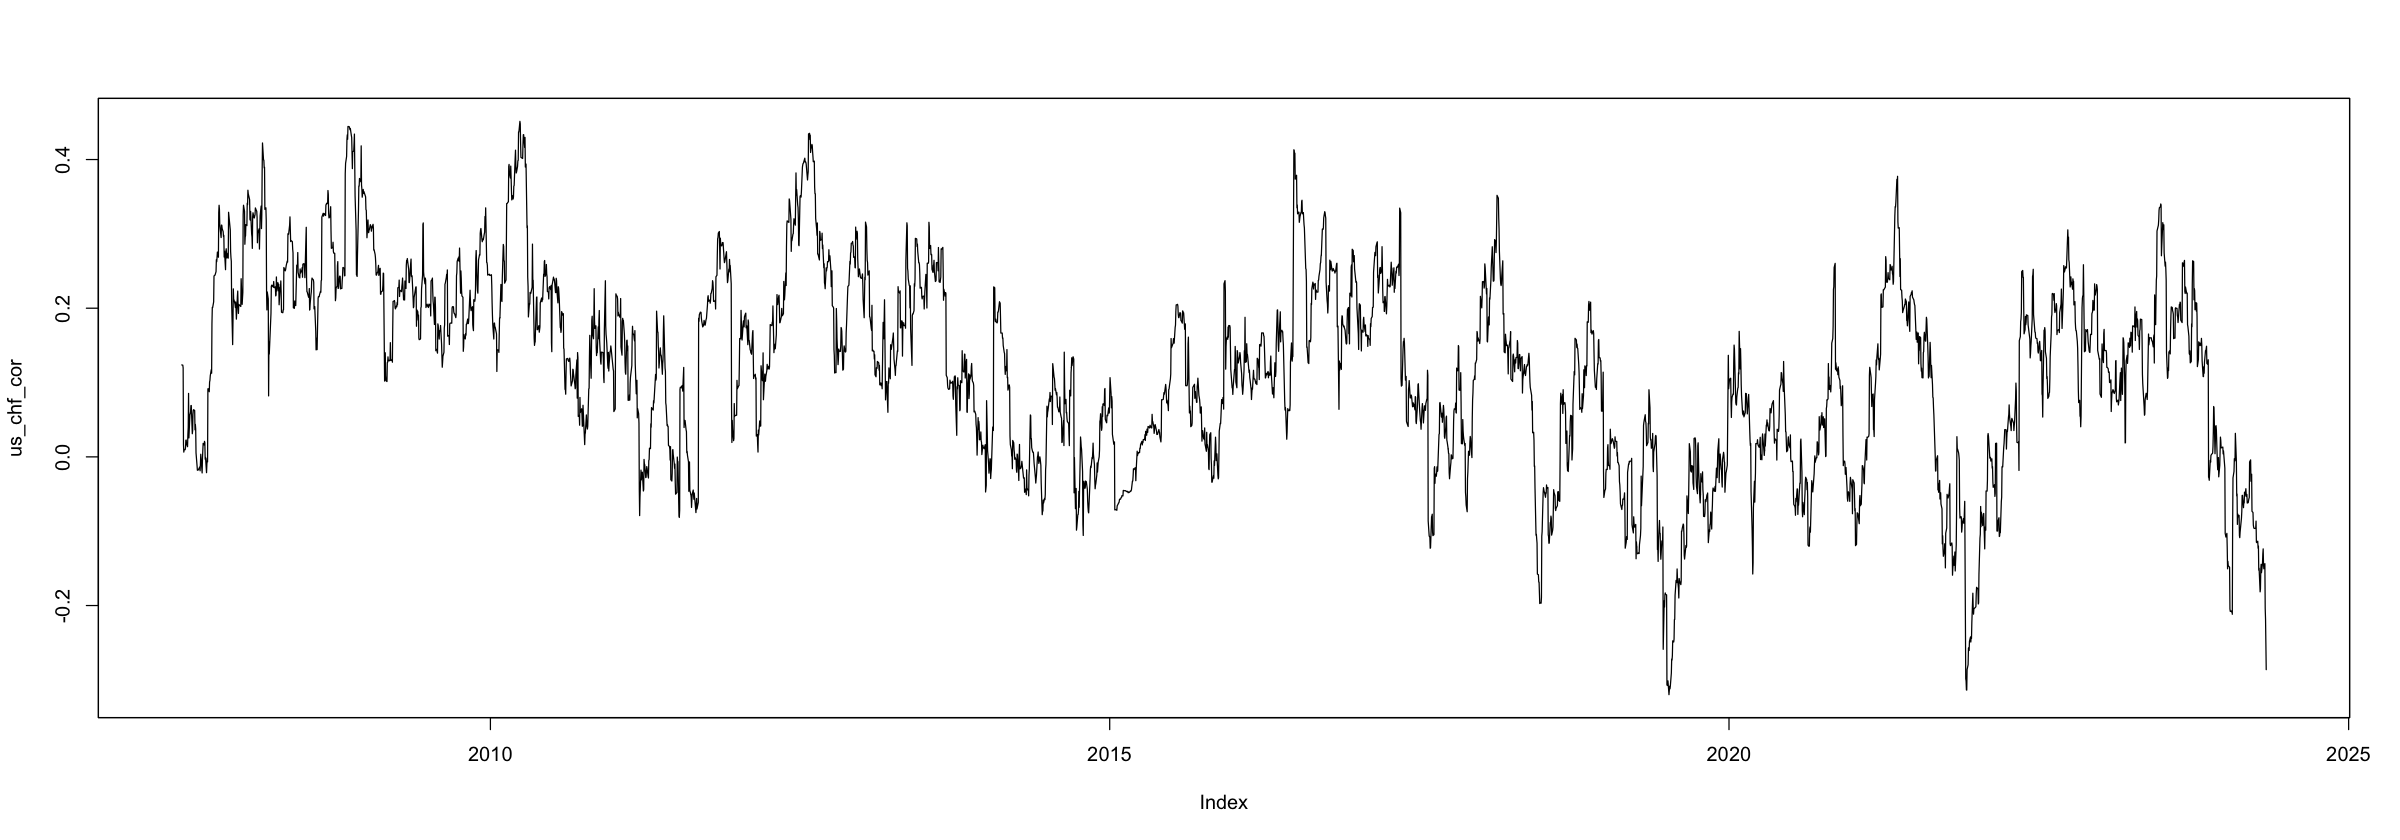

In [377]:
plot.zoo(us_chf_cor)

In [378]:
pdf("us_chf.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(us_chf_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

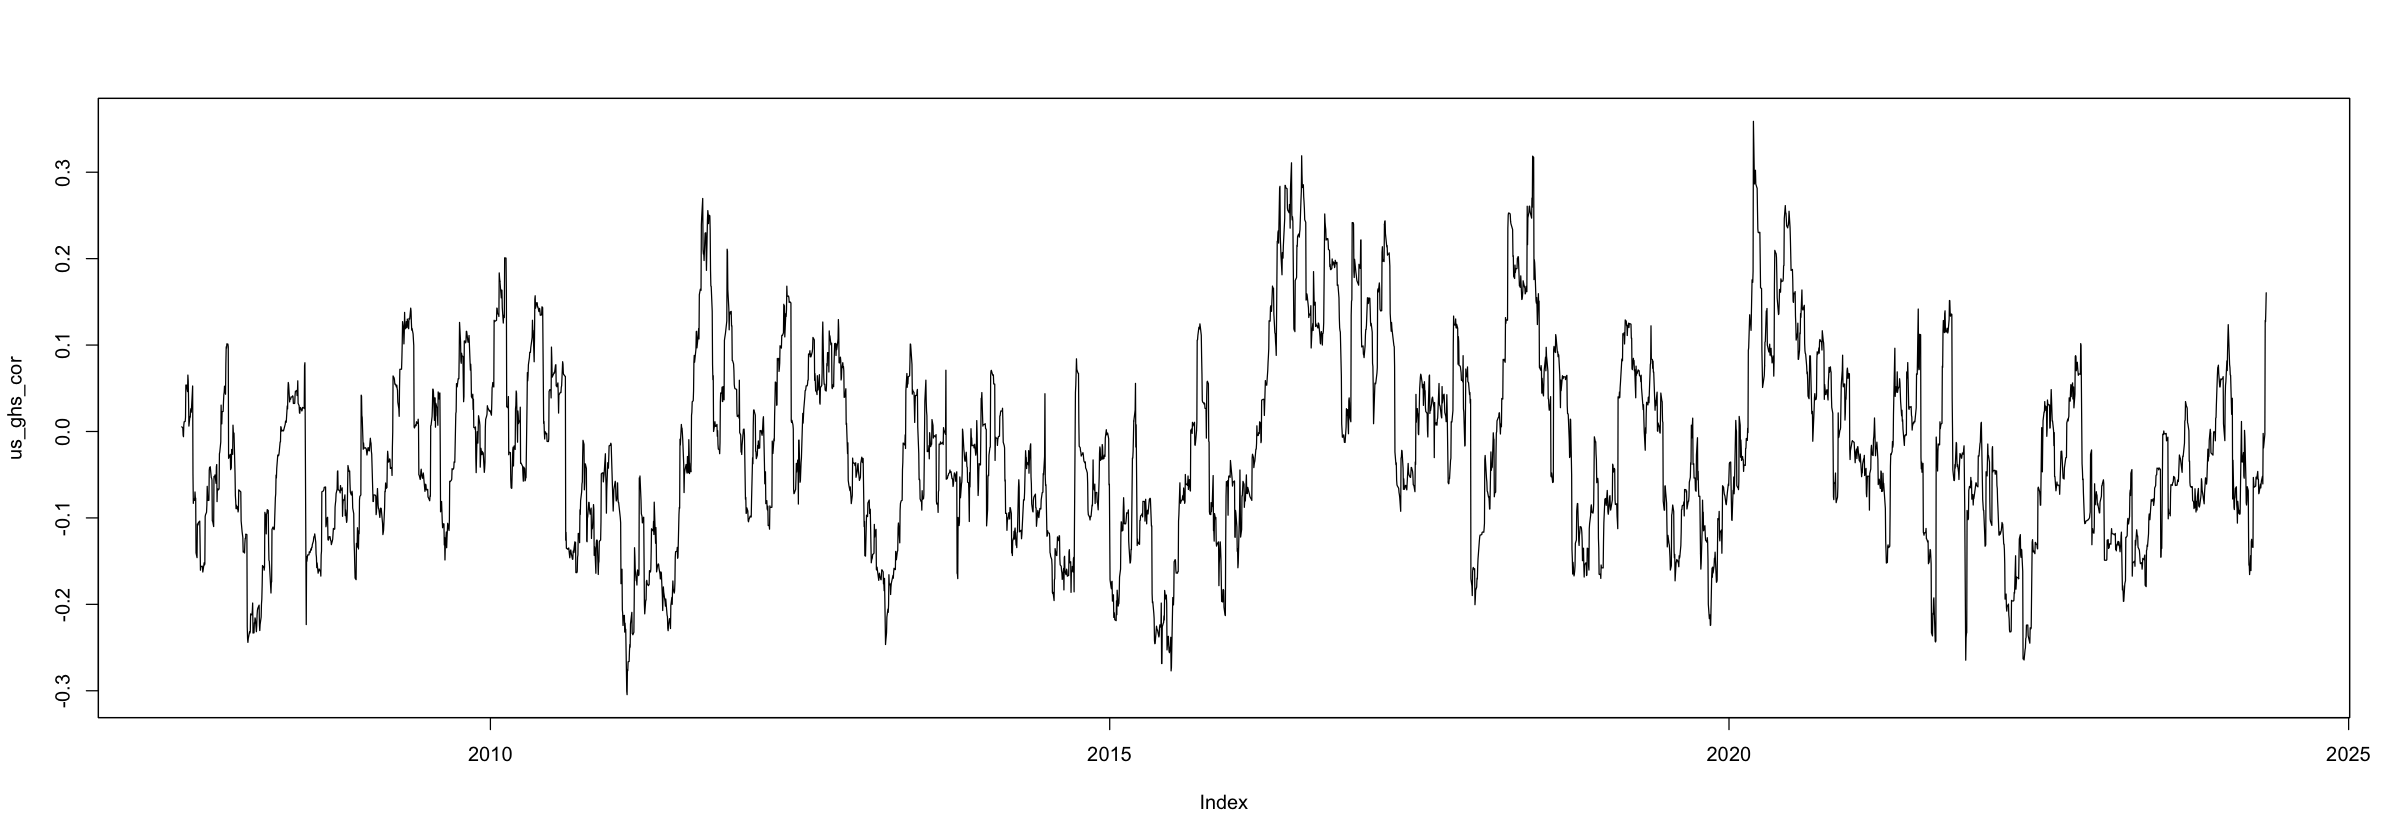

In [379]:
plot.zoo(us_ghs_cor)

In [380]:
pdf("us_ghs.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(us_ghs_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

# VAR-DCC model for London Cocoa and GBP-denominated currency pairs (Section 6.2.3)

## Data preparation

In [381]:
l_d <- na.omit(merge(cr_d[,2],fr_d[,c(4,5,6,8)]))
head(l_d)
tail(l_d)
str(l_d)

                     lc        usdgbp       eurgbp        chfgbp        ghsgbp
2007-07-06  0.005272420  0.0007037652  0.002659380  0.0001273483 -2.614079e-03
2007-07-09 -0.013233541 -0.0025157246 -0.001993871 -0.0009873737  1.236683e-03
2007-07-10 -0.040784991 -0.0056582954  0.002805051  0.0059364761 -5.801912e-03
2007-07-11  0.019240172 -0.0026379885 -0.002952903 -0.0057330414  4.994937e-05
2007-07-12  0.004526943  0.0008124302  0.004573291  0.0037670817  3.716576e-03
2007-07-13 -0.004526943 -0.0020323145 -0.003391083 -0.0020261005 -7.210559e-03

                    lc        usdgbp        eurgbp        chfgbp        ghsgbp
2024-04-26 -0.02951879  0.0018128971 -0.0015173624 -0.0003996004 -0.0018400829
2024-04-29 -0.15652942 -0.0056998056 -0.0031588210 -0.0016571906 -0.0101599929
2024-04-30  0.03216783  0.0056998056  0.0004686036 -0.0040688901  0.0042437477
2024-05-01 -0.08952546 -0.0028145248  0.0018722215  0.0013772526 -0.0050328783
2024-05-02 -0.10077335 -0.0006265272  0.0001168975  0.0049196369 -0.0041962674
2024-05-03  0.04940746 -0.0009405274  0.0025682947  0.0044411620  0.0004565954

An xts object on 2007-07-06 / 2024-05-03 containing: 
  Data:    double [4175, 5]
  Columns: lc, usdgbp, eurgbp, chfgbp, ghsgbp
  Index:   Date [4175] (TZ: "UTC")
  xts Attributes:
    $ na.action       : 'omit' int [1:216] 37 42 100 101 122 123 124 128 142 162 ...
  ..- attr(*, "index")= num [1:216] 1.19e+09 1.19e+09 1.20e+09 1.20e+09 1.20e+09 ...
    $ ret_type        : chr "log"
    $ coredata_content: chr "logReturn"


In [382]:
VARselect(l_d)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-4.907451e+01,-4.907019e+01,-4.907778e+01,-4.907802e+01,-4.907546e+01,-4.907345e+01,-4.906909e+01,-4.906118e+01,-4.906090e+01,-4.905842e+01
HQ(n),-4.905837e+01,-4.904060e+01,-4.903474e+01,-4.902153e+01,-4.900552e+01,-4.899006e+01,-4.897225e+01,-4.895089e+01,-4.893716e+01,-4.892123e+01
SC(n),-4.902889e+01,-4.898654e+01,-4.895611e+01,-4.891833e+01,-4.887774e+01,-4.883771e+01,-4.879534e+01,-4.874940e+01,-4.871110e+01,-4.867059e+01
FPE(n),4.866427e-22,4.887497e-22,4.850531e-22,4.849395e-22,4.861832e-22,4.871621e-22,4.892874e-22,4.931742e-22,4.933131e-22,4.945410e-22


In [383]:
l_var <- varxfit(l_d,p=4)
str(l_var)
l_var$Bcoef
t(l_var$pstat)

List of 10
 $ Bcoef     : num [1:5, 1:21] 0.043218 -0.00509 0.000689 -0.001242 -0.006188 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "lc" "usdgbp" "eurgbp" "chfgbp" ...
  .. ..$ : chr [1:21] "lc.l1" "usdgbp.l1" "eurgbp.l1" "chfgbp.l1" ...
 $ xfitted   : num [1:4171, 1:5] 0.000601 -0.000158 -0.000734 0.000261 0.000921 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "lc" "usdgbp" "eurgbp" "chfgbp" ...
 $ xresiduals: num [1:4171, 1:5] 0.00393 -0.00437 -0.00838 0.01699 -0.00182 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4171] "2007-07-12" "2007-07-13" "2007-07-16" "2007-07-17" ...
  .. ..$ : chr [1:5] "lc" "usdgbp" "eurgbp" "chfgbp" ...
 $ Bcov      :List of 5
  ..$ lc    : num [1:21, 1:21] 2.43e-04 -7.16e-06 -8.88e-05 2.81e-05 5.81e-06 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:21] "lc.l1" "usdgbp.l1" "eurgbp.l1" "chfgbp.l1" ...
  .. .. ..$ : NULL
  ..$ usdgbp: num [1:21, 1:21] 4.09e-05 -1.20e-06 -1.49e-05 4

,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,lc.l2,usdgbp.l2,eurgbp.l2,chfgbp.l2,ghsgbp.l2,⋯,usdgbp.l3,eurgbp.l3,chfgbp.l3,ghsgbp.l3,lc.l4,usdgbp.l4,eurgbp.l4,chfgbp.l4,ghsgbp.l4,const
lc,0.0432177864,0.041046114,0.0814707040,-0.018662712,-0.009891715,0.0068539877,0.04410980,-0.01919953,-0.002098866,-0.018008008,⋯,-0.004591289,-0.002419077,-0.028940253,0.017056744,0.0129027750,0.041127954,0.07710666,-0.05434723,0.036549716,0.0004255792
usdgbp,-0.0050897250,0.012966896,0.0018317963,0.024364098,0.012064384,-0.0059624739,-0.01157558,-0.02132243,0.001494892,0.010797944,⋯,-0.037696404,0.028996914,-0.006105147,0.007375537,0.0008715502,0.018270799,-0.08382109,0.04124149,0.002409268,0.0001073293
eurgbp,0.0006891821,0.033384683,0.0185303100,-0.002217036,-0.002956818,-0.0026790716,-0.01628782,-0.04572195,0.021303996,0.005296364,⋯,-0.029153488,-0.022258678,0.014789977,0.019069104,-0.0016197571,0.005068952,0.02710860,-0.04389793,0.003858954,0.0000588177
chfgbp,-0.0012423262,0.005433585,0.0103844501,0.009097865,-0.009133084,0.0009834806,-0.02981896,-0.03626431,0.021118062,0.012208501,⋯,-0.025423950,-0.018927018,0.003500520,0.016393041,-0.0050126808,-0.005983679,0.01489713,-0.01085667,0.002904760,0.0001874931
ghsgbp,-0.0061883159,0.079330825,-0.0008417472,0.019142142,-0.098610639,-0.0033162496,-0.05345303,0.00103656,-0.032475428,0.085531730,⋯,-0.139208182,-0.020339346,-0.004842444,0.130790083,0.0033324539,-0.043233165,-0.12740834,0.05895852,0.033925446,-0.0004142208


,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,lc.l2,usdgbp.l2,eurgbp.l2,chfgbp.l2,ghsgbp.l2,⋯,usdgbp.l3,eurgbp.l3,chfgbp.l3,ghsgbp.l3,lc.l4,usdgbp.l4,eurgbp.l4,chfgbp.l4,ghsgbp.l4,const
lc,0.00559713,0.41641892,0.1902529,0.6904365,6.668325e-01,0.6620812,0.3815553,0.75740513,0.9642795,4.326003e-01,⋯,0.9274334482,0.9689625,0.5369828,4.572614e-01,0.4124636,0.4135381,0.214767273,0.246099359,0.11187786,0.07107255
usdgbp,0.42609884,0.53116897,0.9427311,0.2047069,2.002785e-01,0.3537187,0.5753860,0.40271617,0.9379830,2.510493e-01,⋯,0.0681531646,0.2552552,0.7507170,4.329932e-01,0.8925822,0.3755811,0.001003342,0.031794193,0.79823855,0.26682623
eurgbp,0.89949891,0.05883244,0.3944185,0.8924177,7.129789e-01,0.6253116,0.3556678,0.03548519,0.1937955,5.093955e-01,⋯,0.0983038742,0.3061018,0.3670923,1.751587e-02,0.7686758,0.7732813,0.212478845,0.007403203,0.63134946,0.47577071
chfgbp,0.86370316,0.81663179,0.7189469,0.6755935,3.915741e-01,0.8924752,0.2022922,0.20854240,0.3314187,2.514814e-01,⋯,0.2770152558,0.5116992,0.8721219,1.235705e-01,0.4925230,0.7976227,0.605419538,0.617476164,0.78535871,0.08651520
ghsgbp,0.61765440,0.04811660,0.9864137,0.6072436,6.655545e-08,0.7901766,0.1821090,0.98325814,0.3832483,2.730943e-06,⋯,0.0005114698,0.6805942,0.8965757,7.367440e-13,0.7899697,0.2794458,0.009898271,0.113348778,0.06333405,0.02706018


## Normal DCC model for London Cocoa and GBP-denominated currency pairs

In [384]:
ugarch_spec_l_n <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "norm")
spec_dcc_l_n <- dccspec(uspec = multispec(replicate(ugarch_spec_l_n,n=5)),
                      model = "DCC",dccOrder = c(1,1),lag = 4,VAR = T,lag.criterion = c("AIC"),distribution = c("mvnorm"))
dcc_fit_l_n <- dccfit(data = l_d,spec = spec_dcc_l_n)
dcc_fit_l_n


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  132
[VAR GARCH DCC UncQ] : [105+15+2+10]
No. Series           :  5
No. Obs.             :  4175
Log-Likelihood       :  75687.83
Av.Log-Likelihood    :  18.13 

Optimal Parameters
-----------------------------------
                 Estimate  Std. Error    t value Pr(>|t|)
[lc].omega       0.000001    0.000002    0.66233 0.507759
[lc].alpha1      0.047573    0.013859    3.43266 0.000598
[lc].beta1       0.948112    0.015206   62.34983 0.000000
[usdgbp].omega   0.000001    0.000002    0.21904 0.826618
[usdgbp].alpha1  0.071230    0.048797    1.45972 0.144367
[usdgbp].beta1   0.916637    0.050912   18.00441 0.000000
[eurgbp].omega   0.000000    0.000000    0.28555 0.775220
[eurgbp].alpha1  0.054804    0.009656    5.67547 0.000000
[eurgbp].beta1   0.941796    0.009888   95.24676 0.000000
[chfgb

In [385]:
dcc_l_norm <- round(dcc_fit_l_n@mfit$matcoef,4)
dcc_l_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[lc].omega,0.0000,0.0000,0.6623,0.5078
[lc].alpha1,0.0476,0.0139,3.4327,0.0006
[lc].beta1,0.9481,0.0152,62.3498,0.0000
[usdgbp].omega,0.0000,0.0000,0.2190,0.8266
[usdgbp].alpha1,0.0712,0.0488,1.4597,0.1444
[usdgbp].beta1,0.9166,0.0509,18.0044,0.0000
[eurgbp].omega,0.0000,0.0000,0.2856,0.7752
[eurgbp].alpha1,0.0548,0.0097,5.6755,0.0000
[eurgbp].beta1,0.9418,0.0099,95.2468,0.0000
[chfgbp].omega,0.0000,0.0000,1.0933,0.2743


In [386]:
dcc_l_n <- rep(NA,17)
for(i in 1:17){
    dcc_l_n[i] = paste0(round(dcc_l_norm[i,1],4)," (",round(dcc_l_norm[i,2],4),")")
}
dcc_l_n

[1] "0 (0)"           "0.0476 (0.0139)" "0.9481 (0.0152)" "0 (0)"          
 [5] "0.0712 (0.0488)" "0.9166 (0.0509)" "0 (0)"           "0.0548 (0.0097)"
 [9] "0.9418 (0.0099)" "0 (0)"           "0.081 (0.0039)"  "0.905 (1e-04)"  
[13] "0 (0)"           "0.1272 (0.0467)" "0.8703 (0.042)"  "0.0405 (0.009)" 
[17] "0.8737 (0.0739)"

## St-t DCC model for London Cocoa and GBP-denominated currency pairs

In [387]:
ugarch_spec_l_t <- ugarchspec(variance.model = list(model = "sGARCH"),distribution.model = "std")
spec_dcc_l_t <- dccspec(uspec = multispec(replicate(ugarch_spec_l_t,n=5)),
                      model = "DCC",dccOrder = c(1,1),lag = 4,VAR = T,lag.criterion = c("AIC"),distribution = c("mvt"))
dcc_fit_l_t <- dccfit(data = l_d,spec = spec_dcc_l_t)
dcc_fit_l_t


*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvt
Model                :  DCC(1,1)
No. Parameters       :  138
[VAR GARCH DCC UncQ] : [105+20+3+10]
No. Series           :  5
No. Obs.             :  4175
Log-Likelihood       :  78672.77
Av.Log-Likelihood    :  18.84 

Optimal Parameters
-----------------------------------
                 Estimate  Std. Error   t value Pr(>|t|)
[lc].omega       0.000002    0.000001   1.79880  0.07205
[lc].alpha1      0.045532    0.004731   9.62337  0.00000
[lc].beta1       0.948781    0.005875 161.48113  0.00000
[lc].shape       6.854042    0.669757  10.23362  0.00000
[usdgbp].omega   0.000000    0.000000   1.28379  0.19922
[usdgbp].alpha1  0.049069    0.003668  13.37662  0.00000
[usdgbp].beta1   0.943098    0.004420 213.37870  0.00000
[usdgbp].shape   8.088432    1.039244   7.78299  0.00000
[eurgbp].omega   0.000000    0.000000   0.60206  0.54713
[eurgbp].alpha1  0.

In [388]:
dcc_l_t <- round(dcc_fit_l_t@mfit$matcoef,4)
dcc_l_t
dcc_l_norm

,Estimate,Std. Error,t value,Pr(>|t|)
[lc].omega,0.0000,0.0000,1.7988,0.0720
[lc].alpha1,0.0455,0.0047,9.6234,0.0000
[lc].beta1,0.9488,0.0059,161.4811,0.0000
[lc].shape,6.8540,0.6698,10.2336,0.0000
[usdgbp].omega,0.0000,0.0000,1.2838,0.1992
[usdgbp].alpha1,0.0491,0.0037,13.3766,0.0000
[usdgbp].beta1,0.9431,0.0044,213.3787,0.0000
[usdgbp].shape,8.0884,1.0392,7.7830,0.0000
[eurgbp].omega,0.0000,0.0000,0.6021,0.5471
[eurgbp].alpha1,0.0513,0.0032,15.8909,0.0000


,Estimate,Std. Error,t value,Pr(>|t|)
[lc].omega,0.0000,0.0000,0.6623,0.5078
[lc].alpha1,0.0476,0.0139,3.4327,0.0006
[lc].beta1,0.9481,0.0152,62.3498,0.0000
[usdgbp].omega,0.0000,0.0000,0.2190,0.8266
[usdgbp].alpha1,0.0712,0.0488,1.4597,0.1444
[usdgbp].beta1,0.9166,0.0509,18.0044,0.0000
[eurgbp].omega,0.0000,0.0000,0.2856,0.7752
[eurgbp].alpha1,0.0548,0.0097,5.6755,0.0000
[eurgbp].beta1,0.9418,0.0099,95.2468,0.0000
[chfgbp].omega,0.0000,0.0000,1.0933,0.2743


In [389]:
dcc_l_n

[1] "0 (0)"           "0.0476 (0.0139)" "0.9481 (0.0152)" "0 (0)"          
 [5] "0.0712 (0.0488)" "0.9166 (0.0509)" "0 (0)"           "0.0548 (0.0097)"
 [9] "0.9418 (0.0099)" "0 (0)"           "0.081 (0.0039)"  "0.905 (1e-04)"  
[13] "0 (0)"           "0.1272 (0.0467)" "0.8703 (0.042)"  "0.0405 (0.009)" 
[17] "0.8737 (0.0739)"

In [390]:
dcc_l_std <- rep(NA,23)
for(i in 1:23){
    dcc_l_std[i] = paste0(round(dcc_l_t[i,1],4)," (",round(dcc_l_t[i,2],4),")")
}
dcc_l_std
params_l<- rownames(dcc_l_t)
params_l

[1] "0 (0)"           "0.0455 (0.0047)" "0.9488 (0.0059)" "6.854 (0.6698)" 
 [5] "0 (0)"           "0.0491 (0.0037)" "0.9431 (0.0044)" "8.0884 (1.0392)"
 [9] "0 (0)"           "0.0513 (0.0032)" "0.9458 (0.0037)" "7.8962 (0.8807)"
[13] "0 (0)"           "0.0802 (0.0155)" "0.8982 (0.0167)" "6.3027 (0.8684)"
[17] "0 (0)"           "0.1588 (0.0172)" "0.8125 (0.0228)" "4.887 (0.3682)" 
[21] "0.0331 (0.0016)" "0.9653 (0.0017)" "7.6288 (0.3423)"

[1] "[lc].omega"      "[lc].alpha1"     "[lc].beta1"      "[lc].shape"     
 [5] "[usdgbp].omega"  "[usdgbp].alpha1" "[usdgbp].beta1"  "[usdgbp].shape" 
 [9] "[eurgbp].omega"  "[eurgbp].alpha1" "[eurgbp].beta1"  "[eurgbp].shape" 
[13] "[chfgbp].omega"  "[chfgbp].alpha1" "[chfgbp].beta1"  "[chfgbp].shape" 
[17] "[ghsgbp].omega"  "[ghsgbp].alpha1" "[ghsgbp].beta1"  "[ghsgbp].shape" 
[21] "[Joint]dcca1"    "[Joint]dccb1"    "[Joint]mshape"

In [391]:
infocriteria(dcc_fit_l_t)
likelihood(dcc_fit_l_t)

,
Akaike,-37.62145
Bayes,-37.41199
Shibata,-37.62354
Hannan-Quinn,-37.54736


[1] 78672.77

## Table summarizing both DCC models for GBP-denominated assets (Table 6.5)

In [392]:
dcc_l_summary <- data.frame("Parameters" = c(params_l,"AIC","BIC","LogLik"),"DCC(norm)"=c(dcc_l_n[1:3],NA,dcc_l_n[4:6],NA,dcc_l_n[7:9],NA,dcc_l_n[10:12],NA,
                            dcc_l_n[13:15],NA,dcc_l_n[16:17],NA,round(infocriteria(dcc_fit_l_n)[1],4),round(infocriteria(dcc_fit_l_n)[2],4),round(likelihood(dcc_fit_l_n),4)),
                             "DCC(t)" = c(dcc_l_std,round(infocriteria(dcc_fit_l_t)[1],4),round(infocriteria(dcc_fit_l_t)[2],4),round(likelihood(dcc_fit_l_t),4)))
dcc_l_summary

Parameters,DCC.norm.,DCC.t.
<chr>,<chr>,<chr>
[lc].omega,0 (0),0 (0)
[lc].alpha1,0.0476 (0.0139),0.0455 (0.0047)
[lc].beta1,0.9481 (0.0152),0.9488 (0.0059)
[lc].shape,NA,6.854 (0.6698)
[usdgbp].omega,0 (0),0 (0)
[usdgbp].alpha1,0.0712 (0.0488),0.0491 (0.0037)
[usdgbp].beta1,0.9166 (0.0509),0.9431 (0.0044)
[usdgbp].shape,NA,8.0884 (1.0392)
[eurgbp].omega,0 (0),0 (0)


## Plots of conditional correlations for London Cocoa and GBP-denominated assets (Fig 6.4)

In [393]:
l_cor <- rcor(dcc_fit_l_t)
l_usd_cor <- xts(l_cor[2,1,],order.by = index(l_d))
l_eur_cor <- xts(l_cor[3,1,],order.by = index(l_d))
l_chf_cor <- xts(l_cor[4,1,],order.by = index(l_d))
l_ghs_cor <- xts(l_cor[5,1,],order.by = index(l_d))

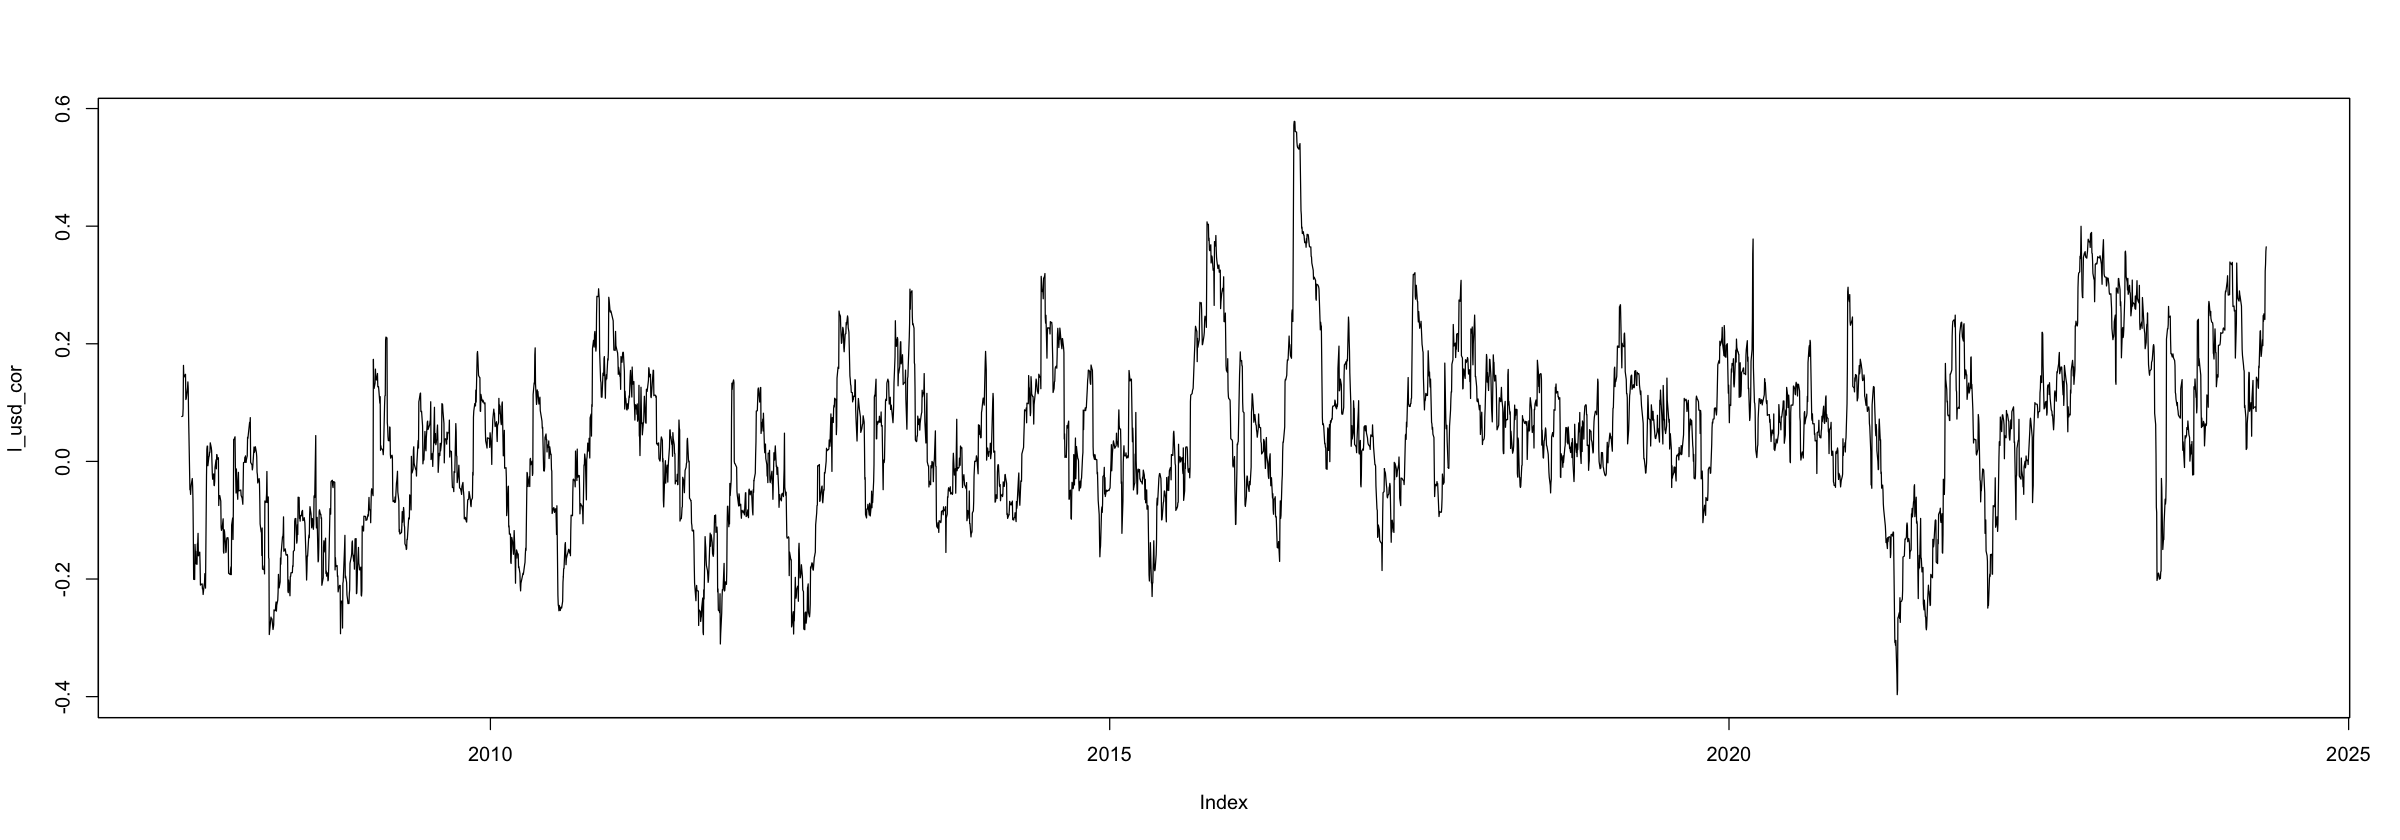

In [394]:
plot.zoo(l_usd_cor)

In [395]:
pdf("l_usd.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(l_usd_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

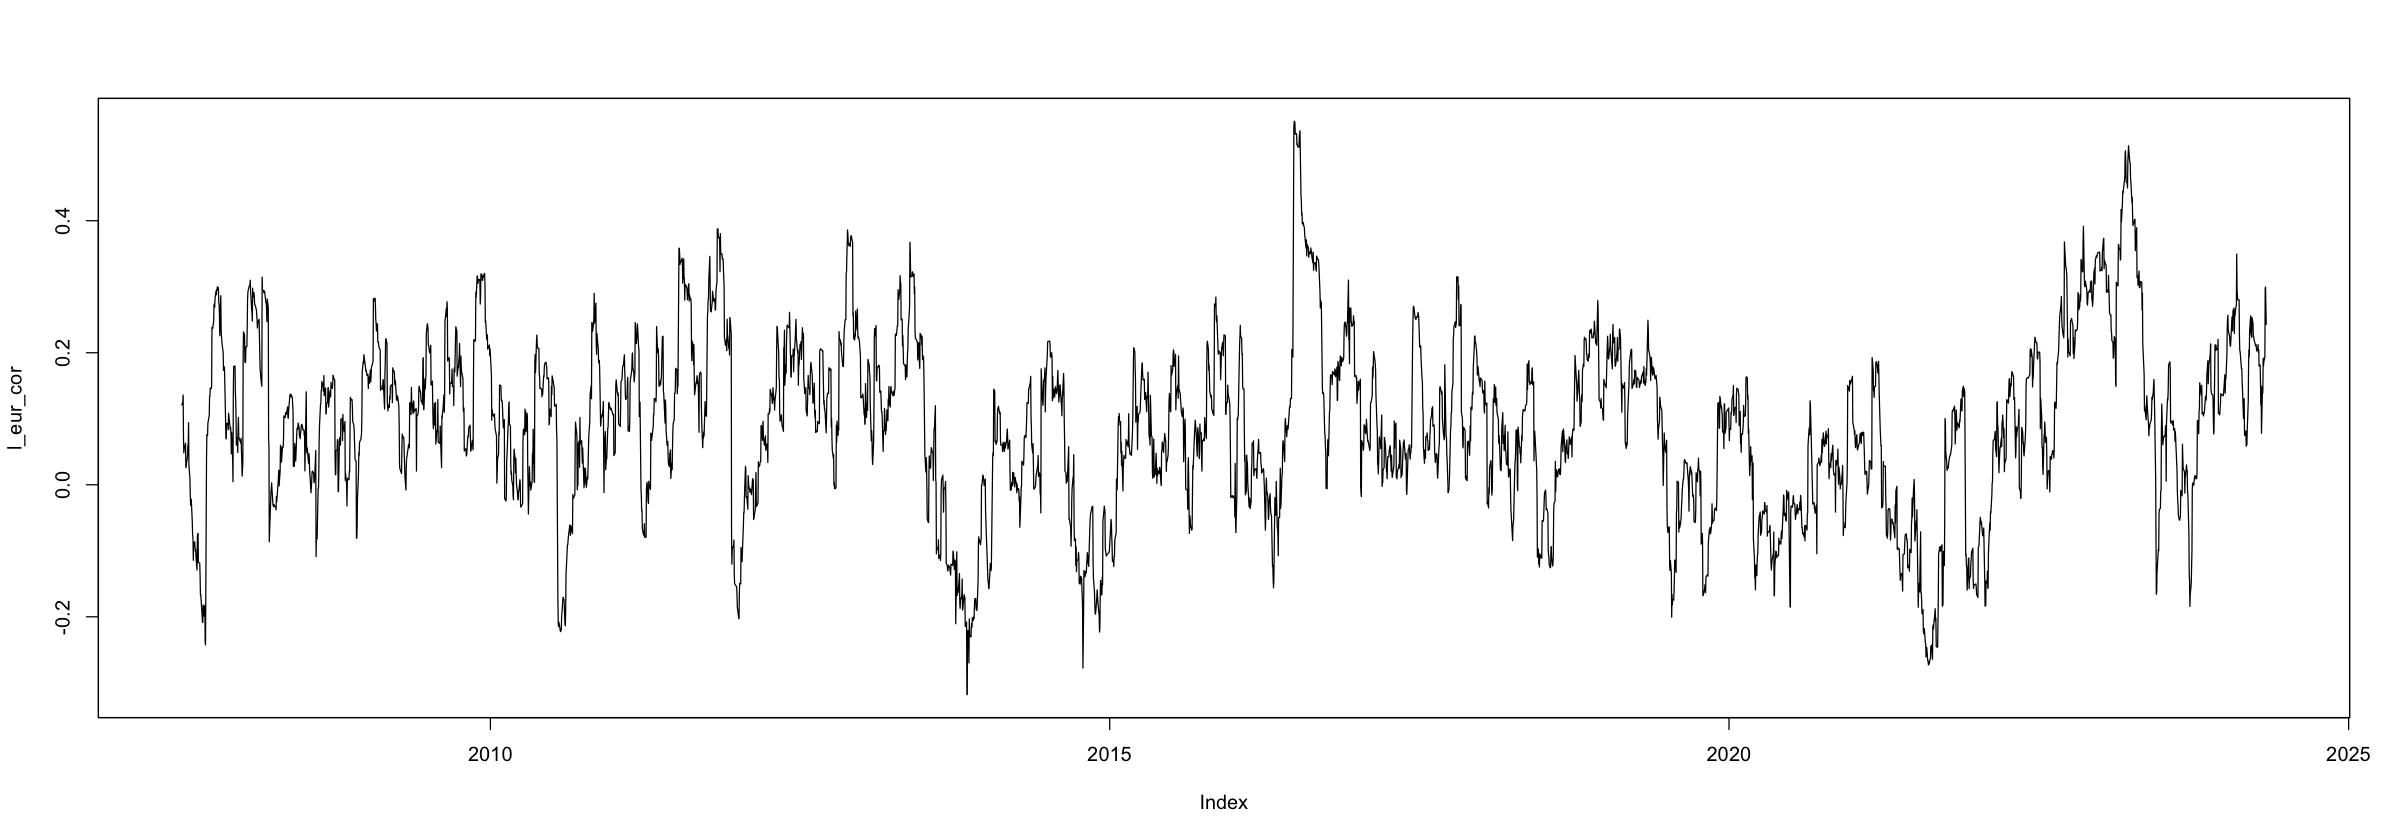

In [396]:
plot.zoo(l_eur_cor)

In [397]:
pdf("l_eur.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(l_eur_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

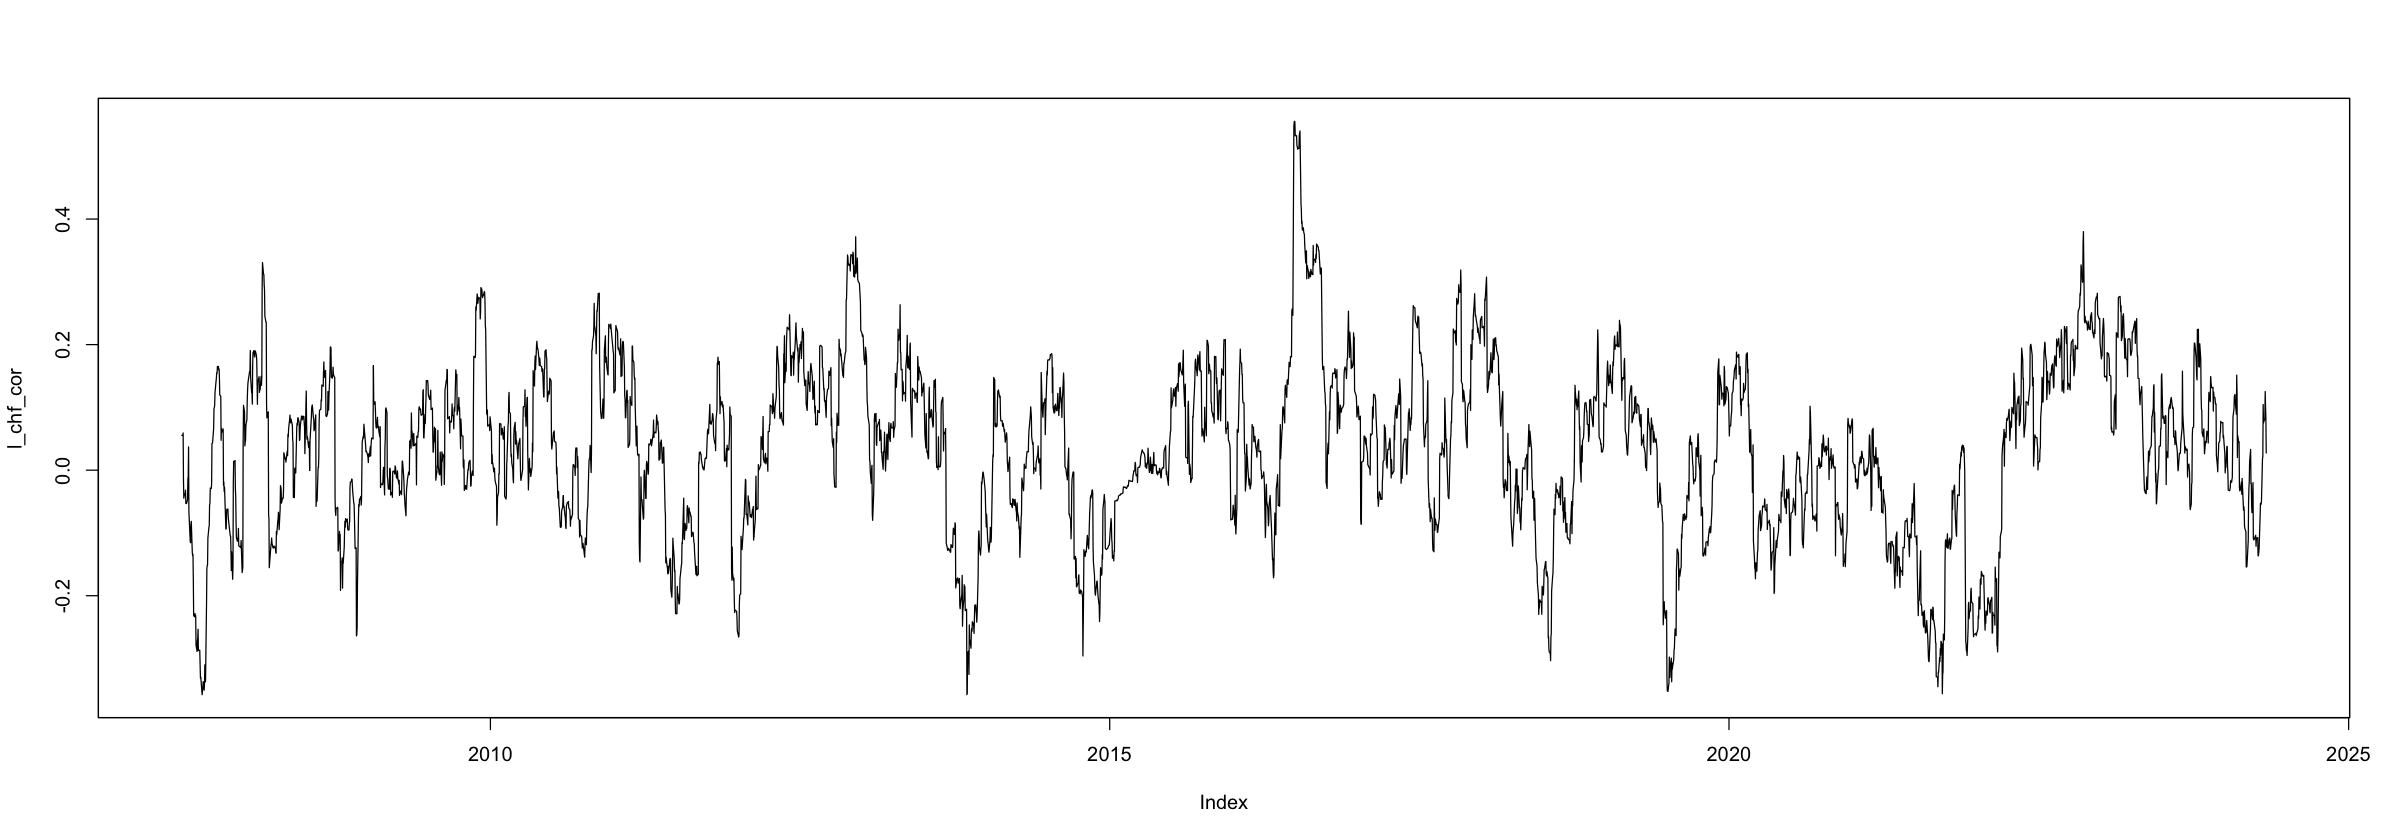

In [398]:
plot.zoo(l_chf_cor)

In [399]:
pdf("l_chf.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(l_chf_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

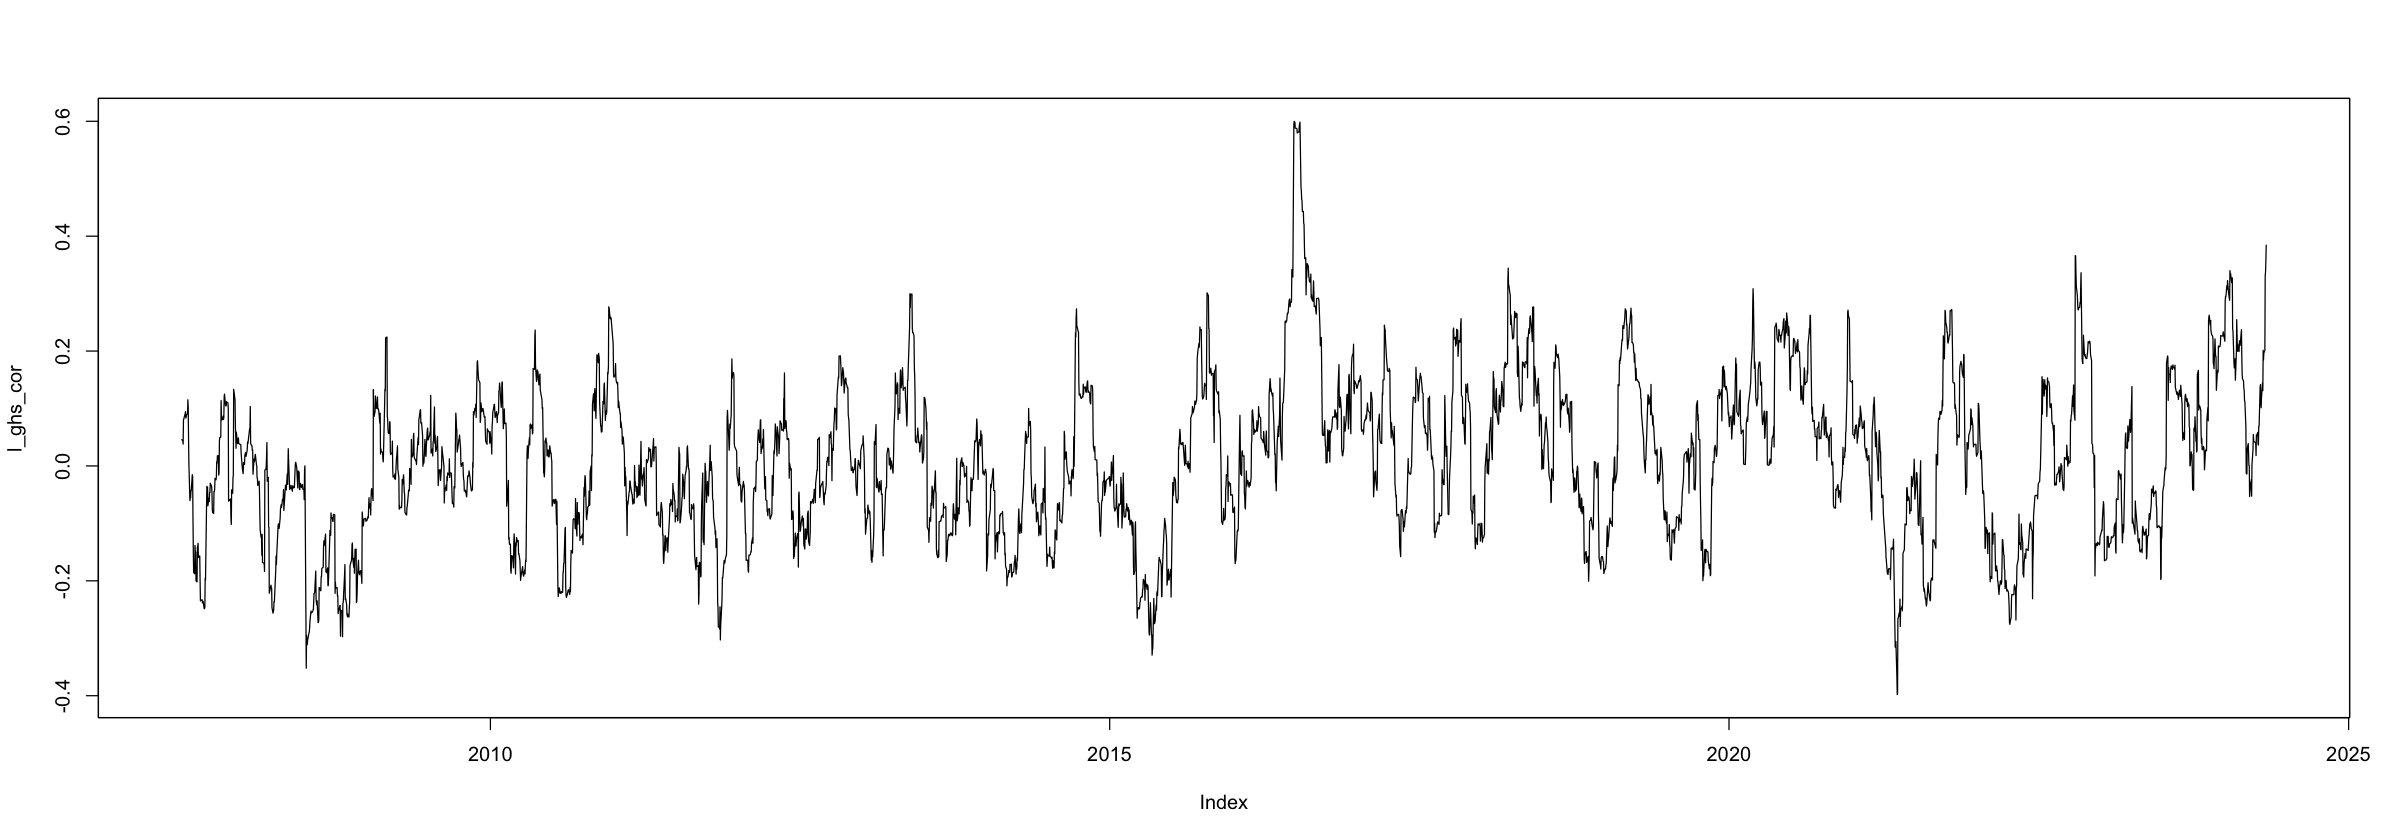

In [400]:
plot.zoo(l_ghs_cor)

In [401]:
pdf("l_ghs.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(l_ghs_cor, xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

## Calculation of premium of London contract over US Cocoa (Fig 3.1)

### Convert London Cocoa to USD -> London Cocoa X GBPUSD = London Cocoa (denom in USD)

In [402]:
library(tidyverse)
head(p)
str(p)

            usc   lc  eurusd  gbpusd  chfusd  usdgbp  eurgbp   chfgbp   ghsusd
2007-07-05 2116 1135 1.35975 2.01155 0.82130 0.49715 0.67595 0.408303 1.074838
2007-07-06 2123 1141 1.36280 2.01055 0.82105 0.49750 0.67775 0.408355 1.071268
2007-07-09 2100 1126 1.36290 2.01510 0.82205 0.49625 0.67640 0.407952 1.075571
2007-07-10 2022 1081 1.37465 2.02675 0.83160 0.49345 0.67830 0.410381 1.075280
2007-07-11 2065 1102 1.37455 2.03240 0.82915 0.49215 0.67630 0.408035 1.078175
2007-07-12 2077 1107 1.37935 2.03040 0.83155 0.49255 0.67940 0.409575 1.081113
              ghsgbp
2007-07-05 0.5343465
2007-07-06 0.5329515
2007-07-09 0.5336110
2007-07-10 0.5305240
2007-07-11 0.5305505
2007-07-12 0.5325260

An xts object on 2007-07-05 / 2024-05-03 containing: 
  Data:    double [4176, 10]
  Columns: usc, lc, eurusd, gbpusd, chfusd ... with 5 more columns
  Index:   Date [4176] (TZ: "UTC")
  xts Attributes:
    $ na.action: 'omit' int [1:216] 38 43 101 102 123 124 125 129 143 163 ...
  ..- attr(*, "index")= num [1:216] 1.19e+09 1.19e+09 1.20e+09 1.20e+09 1.20e+09 ...


            usc   lc  gbpusd   lc_usd  premium
2007-07-05 2116 1135 2.01155 2283.109 167.1092
2007-07-06 2123 1141 2.01055 2294.038 171.0376
2007-07-09 2100 1126 2.01510 2269.003 169.0026
2007-07-10 2022 1081 2.02675 2190.917 168.9167
2007-07-11 2065 1102 2.03240 2239.705 174.7048
2007-07-12 2077 1107 2.03040 2247.653 170.6528

An xts object on 2007-07-05 / 2024-05-03 containing: 
  Data:    double [4176, 5]
  Columns: usc, lc, gbpusd, lc_usd, premium
  Index:   Date [4176] (TZ: "UTC")


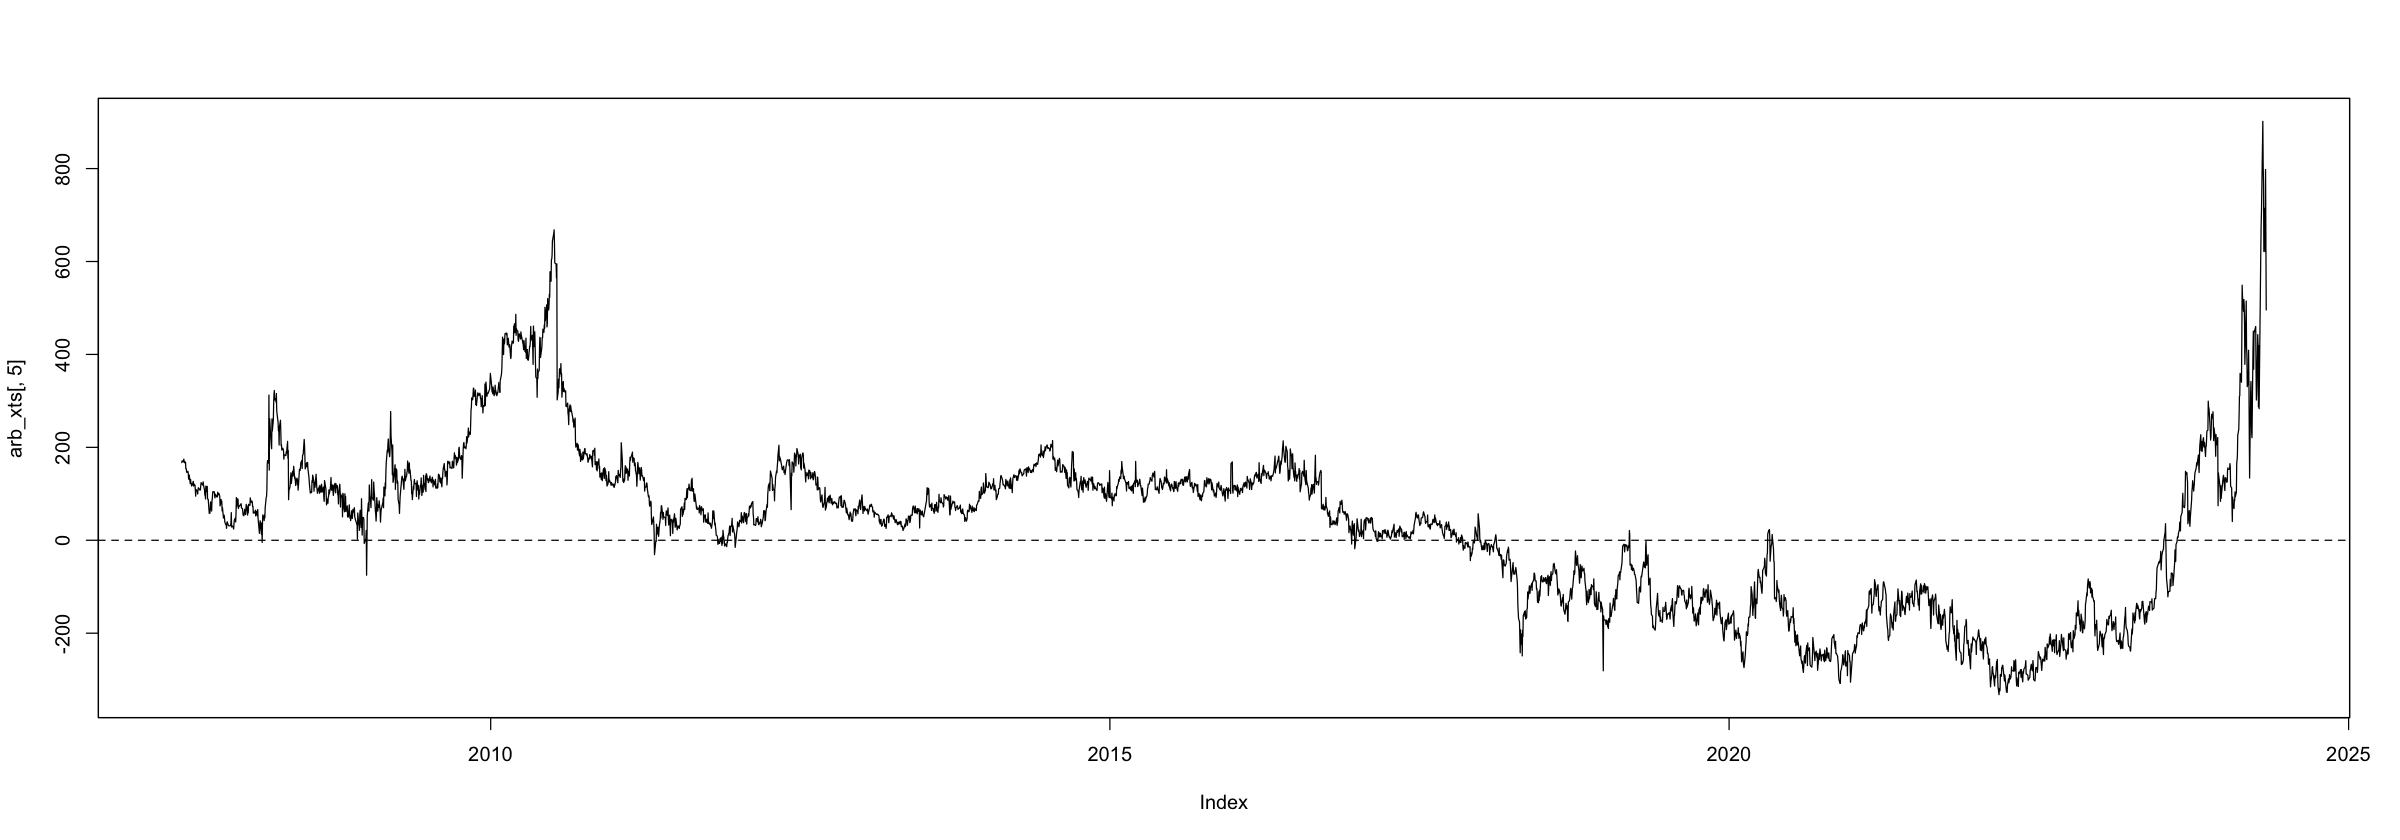

In [403]:
arb <- as.data.frame(p) %>% select(usc,lc,gbpusd) %>% mutate(lc_usd = lc*gbpusd) %>% mutate(premium = lc_usd - usc)
arb_xts <- xts(arb,order.by = index(p))
head(arb_xts)
str(arb_xts)
plot.zoo(arb_xts[,5])
abline(h = 0, lty = 2)

In [404]:
pdf("premium.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(arb_xts[,5], xaxt = "n", type = "l",xlab = NA,ylab = NA)
abline(h = 0, lty = 2)
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

In [405]:
arb_xts["2018-1",]

            usc   lc  gbpusd   lc_usd   premium
2018-01-02 1935 1409 1.35880 1914.549 -20.45080
2018-01-03 1908 1398 1.35155 1889.467 -18.53310
2018-01-04 1908 1393 1.35530 1887.933 -20.06710
2018-01-05 1898 1390 1.35705 1886.300 -11.70050
2018-01-08 1916 1397 1.35680 1895.450 -20.55040
2018-01-09 1906 1403 1.35400 1899.662  -6.33800
2018-01-10 1948 1428 1.35070 1928.800 -19.20040
2018-01-11 1940 1419 1.35380 1921.042 -18.95780
2018-01-12 1928 1403 1.37295 1926.249  -1.75115
2018-01-16 1951 1409 1.37925 1943.363  -7.63675
2018-01-17 2001 1435 1.38270 1984.175 -16.82550
2018-01-18 2004 1425 1.38930 1979.753 -24.24750
2018-01-19 1955 1405 1.38515 1946.136  -8.86425
2018-01-22 1961 1397 1.39875 1954.054  -6.94625
2018-01-23 1953 1389 1.40010 1944.739  -8.26110
2018-01-24 1979 1380 1.42430 1965.534 -13.46600
2018-01-25 1984 1380 1.41465 1952.217 -31.78300
2018-01-26 2010 1403 1.41705 1988.121 -21.87885
2018-01-29 1969 1391 1.40745 1957.763 -11.23705
2018-01-30 1994 1403 1.41465 1984.754  -

# Explanatory analysis of Section 6.2.1 for conditional correlations and various vol measures

In [406]:
str(cocoa_cor)

An xts object on 2007-07-06 / 2024-05-03 containing: 
  Data:    double [4175, 1]
  Index:   Date [4175] (TZ: "UTC")


In [407]:
head(cocoa_cor)

                [,1]
2007-07-06 0.8691440
2007-07-09 0.8690137
2007-07-10 0.8706397
2007-07-11 0.8896695
2007-07-12 0.8941084
2007-07-13 0.8938888

#### Data for the explanatory analysis of correlation dependence on volatility measures

In [408]:
vix_hist <- read_csv("VIX_History.csv")
vix_hist$DATE <- mdy(vix_hist$DATE)
vix_daily <- xts(vix_hist$CLOSE,order.by = vix_hist$DATE)
head(vix_daily)

Rows: 8671 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): DATE
dbl (4): OPEN, HIGH, LOW, CLOSE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


            [,1]
1990-01-02 17.24
1990-01-03 18.19
1990-01-04 19.22
1990-01-05 20.11
1990-01-08 20.26
1990-01-09 22.20

In [409]:
l_vol <-100* sigma(l_fit_std)
str(l_vol)
us_vol <- 100*sigma(us_fit_std)
str(us_vol)
gbpusd_vol <-100*sigma(gbpusd_fit_std)
str(gbpusd_vol)

An xts object on 2007-07-06 / 2024-05-03 containing: 
  Data:    double [4175, 1]
  Index:   Date [4175] (TZ: "UTC")
An xts object on 2007-07-06 / 2024-05-03 containing: 
  Data:    double [4175, 1]
  Index:   Date [4175] (TZ: "UTC")
An xts object on 2007-07-06 / 2024-05-03 containing: 
  Data:    double [4391, 1]
  Index:   Date [4391] (TZ: "UTC")


In [410]:
data_reg <- na.omit(merge(cocoa_cor,vix_daily))
data_reg <- na.omit(merge(data_reg,us_vol))
data_reg <- na.omit(merge(data_reg,l_vol))
data_reg <- na.omit(merge(data_reg,gbpusd_vol))
str(data_reg)
head(data_reg)

An xts object on 2007-07-06 / 2024-05-03 containing: 
  Data:    double [4172, 5]
  Columns: cocoa_cor, vix_daily, us_vol, l_vol, gbpusd_vol
  Index:   Date [4172] (TZ: "UTC")
  xts Attributes:
    $ na.action: 'omit' int [1:219] 37 42 100 101 122 123 124 128 142 162 ...
  ..- attr(*, "index")= num [1:219] 1.19e+09 1.19e+09 1.20e+09 1.20e+09 1.20e+09 ...


           cocoa_cor vix_daily   us_vol    l_vol gbpusd_vol
2007-07-06 0.8691440     14.72 1.757114 1.510014  0.6093121
2007-07-09 0.8690137     15.16 1.727586 1.480464  0.5939420
2007-07-10 0.8706397     17.57 1.711373 1.476781  0.5812615
2007-07-11 0.8896695     16.64 1.830221 1.686358  0.5814213
2007-07-12 0.8941084     15.54 1.839378 1.695305  0.5703924
2007-07-13 0.8938888     15.15 1.810115 1.659298  0.5566738

In [411]:
head(gbpusd_vol)

                [,1]
2007-07-06 0.6093121
2007-07-09 0.5939420
2007-07-10 0.5812615
2007-07-11 0.5814213
2007-07-12 0.5703924
2007-07-13 0.5566738

### Linear Regressions

In [412]:
reg_l <- lm(cocoa_cor~l_vol,data = data_reg)
summary(reg_l)


Call:
lm(formula = cocoa_cor ~ l_vol, data = data_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71722 -0.01768  0.01532  0.03867  0.07482 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.810397   0.003608   224.6   <2e-16 ***
l_vol       0.037200   0.002431    15.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06602 on 4170 degrees of freedom
Multiple R-squared:  0.05318,	Adjusted R-squared:  0.05295 
F-statistic: 234.2 on 1 and 4170 DF,  p-value: < 2.2e-16


In [413]:
reg_us <- lm(cocoa_cor~us_vol,data = data_reg)
summary(reg_us)


Call:
lm(formula = cocoa_cor ~ us_vol, data = data_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72506 -0.01965  0.01514  0.03904  0.07986 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.822179   0.003913  210.14   <2e-16 ***
us_vol      0.024625   0.002256   10.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0669 on 4170 degrees of freedom
Multiple R-squared:  0.02777,	Adjusted R-squared:  0.02754 
F-statistic: 119.1 on 1 and 4170 DF,  p-value: < 2.2e-16


In [414]:
reg_us_l <- lm(cocoa_cor~us_vol+l_vol)
summary(reg_us_l)


Call:
lm(formula = cocoa_cor ~ us_vol + l_vol)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70913 -0.01719  0.01596  0.03783  0.07571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.821454   0.003831 214.425  < 2e-16 ***
us_vol      -0.046685   0.005762  -8.102 7.03e-16 ***
l_vol        0.084286   0.006290  13.400  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0655 on 4172 degrees of freedom
Multiple R-squared:  0.06789,	Adjusted R-squared:  0.06744 
F-statistic: 151.9 on 2 and 4172 DF,  p-value: < 2.2e-16


In [415]:
reg3 <- lm(cocoa_cor~vix_daily+l_vol+us_vol,data = data_reg)
summary(reg3)


Call:
lm(formula = cocoa_cor ~ vix_daily + l_vol + us_vol, data = data_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71523 -0.01526  0.01497  0.03562  0.09792 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.8330498  0.0039231 212.344   <2e-16 ***
vix_daily   -0.0013915  0.0001266 -10.991   <2e-16 ***
l_vol        0.0563618  0.0067056   8.405   <2e-16 ***
us_vol      -0.0130532  0.0064555  -2.022   0.0432 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06459 on 4168 degrees of freedom
Multiple R-squared:  0.09407,	Adjusted R-squared:  0.09342 
F-statistic: 144.3 on 3 and 4168 DF,  p-value: < 2.2e-16


In [416]:
reg4 <- lm(cocoa_cor~gbpusd_vol,data = data_reg)
summary(reg4)


Call:
lm(formula = cocoa_cor ~ gbpusd_vol, data = data_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44389 -0.02524  0.00633  0.03186  0.17588 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.976525   0.002554  382.32   <2e-16 ***
gbpusd_vol  -0.196401   0.004181  -46.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05486 on 4170 degrees of freedom
Multiple R-squared:  0.3461,	Adjusted R-squared:  0.3459 
F-statistic:  2207 on 1 and 4170 DF,  p-value: < 2.2e-16


In [417]:
reg5 <- lm(cocoa_cor~vix_daily+l_vol+us_vol+gbpusd_vol,data = data_reg)
summary(reg5)


Call:
lm(formula = cocoa_cor ~ vix_daily + l_vol + us_vol + gbpusd_vol, 
    data = data_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34097 -0.02406  0.00892  0.03031  0.14124 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.9056630  0.0031660  286.06   <2e-16 ***
vix_daily    0.0012840  0.0001045   12.28   <2e-16 ***
l_vol       -0.0129435  0.0051156   -2.53   0.0114 *  
us_vol       0.0630413  0.0049646   12.70   <2e-16 ***
gbpusd_vol  -0.2694141  0.0046185  -58.33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04793 on 4167 degrees of freedom
Multiple R-squared:  0.5013,	Adjusted R-squared:  0.5008 
F-statistic:  1047 on 4 and 4167 DF,  p-value: < 2.2e-16


### Table 6.3: Summary of linear regressions for the relationship between volatility measures and the conditional correlation

In [418]:
stargazer(reg_us,reg_l,reg_us_l,reg3,reg4,reg5)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Thu, Jul 18, 2024 - 14:42:21
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{6}{c}{\textit{Dependent variable:}} \\ 
\cline{2-7} 
\\[-1.8ex] & \multicolumn{6}{c}{cocoa\_cor} \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6)\\ 
\hline \\[-1.8ex] 
 vix\_daily &  &  &  & $-$0.001$^{***}$ &  & 0.001$^{***}$ \\ 
  &  &  &  & (0.0001) &  & (0.0001) \\ 
  & & & & & & \\ 
 us\_vol & 0.025$^{***}$ &  & $-$0.047$^{***}$ & $-$0.013$^{**}$ &  & 0.063$^{***}$ \\ 
  & (0.002) &  & (0.006) & (0.006) &  & (0.005) \\ 
  & & & & & & \\ 
 l\_vol &  & 0.037$^{***}$ & 0.084$^{***}$ & 0.056$^{***}$ &  & $-$0.013$^{**}$ \\ 
  &  & (0.002) & (0.006) & (0.007) &  & (0.005) \\ 
  & & & & & & \\ 
 gbpusd\_vol &  &  &  &  & $-$0.196$^{***}$ & $-$0.269$^{***}$ \\ 
  &  &  &  &

### Plot of conditional volatility of GBPUSD (Fig A.10)

In [419]:
pdf("gbpusd_sigma.pdf",width = 10,height = 3)
par(mar = c(2, 2, 2, 2))
plot.zoo(sigma(gbpusd_fit_std), xaxt = "n", type = "l",xlab = NA,ylab = NA)  
years <- seq(as.Date("2007-01-01"), as.Date("2024-01-01"), by = "4 years")
axis(1, at = years, labels = format(years, "%Y"))
dev.off()

pdf 
  2

# Summary of VAR models
we have got three types of DCC models, for both cocoa futures, US assets and GBP assets

- Cocoa Futures: Daily and Weekly for norm and St t –> 4 models
- US assets: Daily and Weekly for norm and St t –> 4 models
- GBP assets: Daily and Weekly for norm and St t –> 4 models

Therefore, we have 12 models in total.

# VAR models from VAR-DCC models (see Apendix A)

## Table A.6: Daily Cocoa model with norm and St t (VAR is the same...), lag = 1 (Table A.6)

In [420]:
dcc_fit_2@model$varcoef

,usc.l1,lc.l1,const
usc,-0.08040472,0.11585415,0.0002905429
lc,-0.02052888,0.06783996,0.0004145675


In [421]:
var_fit_2 <- varxfit(cr_d,p=1)
var_fit_2$Bcoef
t(var_fit_2$pstat)

,usc.l1,lc.l1,const
usc,-0.08040472,0.11585415,0.0002905429
lc,-0.02052888,0.06783996,0.0004145675


,usc.l1,lc.l1,const
usc,0.01336325,0.002167969,0.28523527
lc,0.46235558,0.036692458,0.07602349


In [422]:
var_daily_cocoa <- var_fit_2$Bcoef
stargazer(var_daily_cocoa,summary = F,digits = 4)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Thu, Jul 18, 2024 - 14:42:21
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} cccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & usc.l1 & lc.l1 & const \\ 
\hline \\[-1.8ex] 
usc & $$-$0.0804$ & $0.1159$ & $0.0003$ \\ 
lc & $$-$0.0205$ & $0.0678$ & $0.0004$ \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


## Daily VAR USD model with norm and St, lag = 3 (Table A.8)

In [423]:
v_us <- data.frame(rbind(round(dcc_fit_us_n@model$varcoef[,1:8],4),colnames(dcc_fit_us_n@model$varcoef[,9:16]),round(dcc_fit_us_n@model$varcoef[,9:16],4)))

In [424]:
us_var$Bcoef
t(us_var$pstat)

,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,usc.l2,eurusd.l2,gbpusd.l2,chfusd.l2,ghsusd.l2,usc.l3,eurusd.l3,gbpusd.l3,chfusd.l3,ghsusd.l3,const
usc,-0.011393381,0.184516004,0.1110674995,-0.06928703,-0.007192573,0.007881548,-0.02869948,-0.019829076,0.021869819,-0.016215400,0.016331718,0.03480795,-0.003130899,-0.060371851,0.010209831,3.413280e-04
eurusd,0.006609744,0.020433167,-0.0000817252,-0.02766142,-0.014131869,0.004070330,-0.02636552,0.009593350,0.017988134,-0.005419436,0.007503035,-0.05019144,0.003547979,0.020420067,0.009433512,-6.710067e-05
gbpusd,0.002852750,-0.003512483,0.0500666096,-0.02361055,-0.012434899,0.006637993,0.02122512,-0.027232763,-0.001765819,-0.011812787,0.003849991,-0.02995658,-0.011467891,0.006171107,-0.006863554,-1.090067e-04
chfusd,0.004657960,0.005071119,0.0321271757,-0.01421283,-0.020918536,0.005228688,-0.01289508,0.006677269,0.017206940,0.000705971,0.005142870,-0.04479458,0.008442872,0.009755963,0.007912308,7.056898e-05
ghsusd,0.005228210,-0.007672967,0.0508435108,-0.01278542,-0.113412999,-0.002253356,0.02901969,-0.027205413,-0.027161817,0.090117598,0.004123156,-0.05552592,0.027789621,0.014464915,0.114033701,-5.512080e-04


,usc.l1,eurusd.l1,gbpusd.l1,chfusd.l1,ghsusd.l1,usc.l2,eurusd.l2,gbpusd.l2,chfusd.l2,ghsusd.l2,usc.l3,eurusd.l3,gbpusd.l3,chfusd.l3,ghsusd.l3,const
usc,0.4771913,0.01087905,0.04833842,0.2052310,7.878456e-01,0.6242430,0.6921876,0.7248572,0.6893704,5.451386e-01,0.3117060,0.63093184,0.9556649,0.2695954,7.024855e-01,0.2122929352
eurusd,0.2154962,0.39698993,0.99651846,0.1287613,1.122647e-01,0.4473628,0.2746732,0.6090287,0.3234188,5.436010e-01,0.1627319,0.03746508,0.8499173,0.2620499,2.891357e-01,0.4614465079
gbpusd,0.6137523,0.89065791,0.01160621,0.2208926,1.870460e-01,0.2420246,0.4063770,0.1704314,0.9270779,2.113068e-01,0.4988525,0.24099913,0.5636257,0.7489544,4.665060e-01,0.2586429544
chfusd,0.4450893,0.85408651,0.13343589,0.4947199,3.972461e-02,0.3931517,0.6402077,0.7554619,0.4085912,9.448144e-01,0.4025358,0.10425408,0.6936275,0.6392208,4.366685e-01,0.4980167633
ghsusd,0.5715276,0.85425712,0.11693647,0.6851258,1.831868e-13,0.8080607,0.4874492,0.4022244,0.3891770,5.448397e-09,0.6577474,0.18373647,0.3920281,0.6463582,1.361133e-13,0.0004760219


In [425]:
t(us_var$pstat)[4,5]

[1] 0.03972461

## Daily VAR GBP model with norm and St, lag = 4 (Table A.9.)

In [426]:
dcc_fit_l_n@model$varcoef

,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,lc.l2,usdgbp.l2,eurgbp.l2,chfgbp.l2,ghsgbp.l2,⋯,usdgbp.l3,eurgbp.l3,chfgbp.l3,ghsgbp.l3,lc.l4,usdgbp.l4,eurgbp.l4,chfgbp.l4,ghsgbp.l4,const
lc,0.0432177864,0.041046114,0.0814707040,-0.018662712,-0.009891715,0.0068539877,0.04410980,-0.01919953,-0.002098866,-0.018008008,⋯,-0.004591289,-0.002419077,-0.028940253,0.017056744,0.0129027750,0.041127954,0.07710666,-0.05434723,0.036549716,0.0004255792
usdgbp,-0.0050897250,0.012966896,0.0018317963,0.024364098,0.012064384,-0.0059624739,-0.01157558,-0.02132243,0.001494892,0.010797944,⋯,-0.037696404,0.028996914,-0.006105147,0.007375537,0.0008715502,0.018270799,-0.08382109,0.04124149,0.002409268,0.0001073293
eurgbp,0.0006891821,0.033384683,0.0185303100,-0.002217036,-0.002956818,-0.0026790716,-0.01628782,-0.04572195,0.021303996,0.005296364,⋯,-0.029153488,-0.022258678,0.014789977,0.019069104,-0.0016197571,0.005068952,0.02710860,-0.04389793,0.003858954,0.0000588177
chfgbp,-0.0012423262,0.005433585,0.0103844501,0.009097865,-0.009133084,0.0009834806,-0.02981896,-0.03626431,0.021118062,0.012208501,⋯,-0.025423950,-0.018927018,0.003500520,0.016393041,-0.0050126808,-0.005983679,0.01489713,-0.01085667,0.002904760,0.0001874931
ghsgbp,-0.0061883159,0.079330825,-0.0008417472,0.019142142,-0.098610639,-0.0033162496,-0.05345303,0.00103656,-0.032475428,0.085531730,⋯,-0.139208182,-0.020339346,-0.004842444,0.130790083,0.0033324539,-0.043233165,-0.12740834,0.05895852,0.033925446,-0.0004142208


In [427]:
l_var$Bcoef[,1:10]
t(l_var$pstat)[,1:10]
l_var$Bcoef[,11:21]
t(l_var$pstat)[,11:21]

,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,lc.l2,usdgbp.l2,eurgbp.l2,chfgbp.l2,ghsgbp.l2
lc,0.0432177864,0.041046114,0.0814707040,-0.018662712,-0.009891715,0.0068539877,0.04410980,-0.01919953,-0.002098866,-0.018008008
usdgbp,-0.0050897250,0.012966896,0.0018317963,0.024364098,0.012064384,-0.0059624739,-0.01157558,-0.02132243,0.001494892,0.010797944
eurgbp,0.0006891821,0.033384683,0.0185303100,-0.002217036,-0.002956818,-0.0026790716,-0.01628782,-0.04572195,0.021303996,0.005296364
chfgbp,-0.0012423262,0.005433585,0.0103844501,0.009097865,-0.009133084,0.0009834806,-0.02981896,-0.03626431,0.021118062,0.012208501
ghsgbp,-0.0061883159,0.079330825,-0.0008417472,0.019142142,-0.098610639,-0.0033162496,-0.05345303,0.00103656,-0.032475428,0.085531730


,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,lc.l2,usdgbp.l2,eurgbp.l2,chfgbp.l2,ghsgbp.l2
lc,0.00559713,0.41641892,0.1902529,0.6904365,6.668325e-01,0.6620812,0.3815553,0.75740513,0.9642795,4.326003e-01
usdgbp,0.42609884,0.53116897,0.9427311,0.2047069,2.002785e-01,0.3537187,0.5753860,0.40271617,0.9379830,2.510493e-01
eurgbp,0.89949891,0.05883244,0.3944185,0.8924177,7.129789e-01,0.6253116,0.3556678,0.03548519,0.1937955,5.093955e-01
chfgbp,0.86370316,0.81663179,0.7189469,0.6755935,3.915741e-01,0.8924752,0.2022922,0.20854240,0.3314187,2.514814e-01
ghsgbp,0.61765440,0.04811660,0.9864137,0.6072436,6.655545e-08,0.7901766,0.1821090,0.98325814,0.3832483,2.730943e-06


,lc.l3,usdgbp.l3,eurgbp.l3,chfgbp.l3,ghsgbp.l3,lc.l4,usdgbp.l4,eurgbp.l4,chfgbp.l4,ghsgbp.l4,const
lc,0.014229079,-0.004591289,-0.002419077,-0.028940253,0.017056744,0.0129027750,0.041127954,0.07710666,-0.05434723,0.036549716,0.0004255792
usdgbp,-0.005413606,-0.037696404,0.028996914,-0.006105147,0.007375537,0.0008715502,0.018270799,-0.08382109,0.04124149,0.002409268,0.0001073293
eurgbp,0.004315388,-0.029153488,-0.022258678,0.014789977,0.019069104,-0.0016197571,0.005068952,0.02710860,-0.04389793,0.003858954,0.0000588177
chfgbp,-0.001093707,-0.025423950,-0.018927018,0.003500520,0.016393041,-0.0050126808,-0.005983679,0.01489713,-0.01085667,0.002904760,0.0001874931
ghsgbp,-0.009032561,-0.139208182,-0.020339346,-0.004842444,0.130790083,0.0033324539,-0.043233165,-0.12740834,0.05895852,0.033925446,-0.0004142208


,lc.l3,usdgbp.l3,eurgbp.l3,chfgbp.l3,ghsgbp.l3,lc.l4,usdgbp.l4,eurgbp.l4,chfgbp.l4,ghsgbp.l4,const
lc,0.3662303,0.9274334482,0.9689625,0.5369828,4.572614e-01,0.4124636,0.4135381,0.214767273,0.246099359,0.11187786,0.07107255
usdgbp,0.4017243,0.0681531646,0.2552552,0.7507170,4.329932e-01,0.8925822,0.3755811,0.001003342,0.031794193,0.79823855,0.26682623
eurgbp,0.4334237,0.0983038742,0.3061018,0.3670923,1.751587e-02,0.7686758,0.7732813,0.212478845,0.007403203,0.63134946,0.47577071
chfgbp,0.8810007,0.2770152558,0.5116992,0.8721219,1.235705e-01,0.4925230,0.7976227,0.605419538,0.617476164,0.78535871,0.08651520
ghsgbp,0.4704578,0.0005114698,0.6805942,0.8965757,7.367440e-13,0.7899697,0.2794458,0.009898271,0.113348778,0.06333405,0.02706018


In [428]:
t(l_var$pstat)[3,15]

[1] 0.01751587

In [429]:
v_l <- data.frame(rbind(round(dcc_fit_l_n@model$varcoef[,1:7],4),colnames(dcc_fit_l_n@model$varcoef[,8:14]),round(dcc_fit_l_n@model$varcoef[,8:14],4),
                       colnames(dcc_fit_l_n@model$varcoef[,15:21]),round(dcc_fit_l_n@model$varcoef[,15:21],4)))

In [430]:
l_var$Bcoef

,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,lc.l2,usdgbp.l2,eurgbp.l2,chfgbp.l2,ghsgbp.l2,⋯,usdgbp.l3,eurgbp.l3,chfgbp.l3,ghsgbp.l3,lc.l4,usdgbp.l4,eurgbp.l4,chfgbp.l4,ghsgbp.l4,const
lc,0.0432177864,0.041046114,0.0814707040,-0.018662712,-0.009891715,0.0068539877,0.04410980,-0.01919953,-0.002098866,-0.018008008,⋯,-0.004591289,-0.002419077,-0.028940253,0.017056744,0.0129027750,0.041127954,0.07710666,-0.05434723,0.036549716,0.0004255792
usdgbp,-0.0050897250,0.012966896,0.0018317963,0.024364098,0.012064384,-0.0059624739,-0.01157558,-0.02132243,0.001494892,0.010797944,⋯,-0.037696404,0.028996914,-0.006105147,0.007375537,0.0008715502,0.018270799,-0.08382109,0.04124149,0.002409268,0.0001073293
eurgbp,0.0006891821,0.033384683,0.0185303100,-0.002217036,-0.002956818,-0.0026790716,-0.01628782,-0.04572195,0.021303996,0.005296364,⋯,-0.029153488,-0.022258678,0.014789977,0.019069104,-0.0016197571,0.005068952,0.02710860,-0.04389793,0.003858954,0.0000588177
chfgbp,-0.0012423262,0.005433585,0.0103844501,0.009097865,-0.009133084,0.0009834806,-0.02981896,-0.03626431,0.021118062,0.012208501,⋯,-0.025423950,-0.018927018,0.003500520,0.016393041,-0.0050126808,-0.005983679,0.01489713,-0.01085667,0.002904760,0.0001874931
ghsgbp,-0.0061883159,0.079330825,-0.0008417472,0.019142142,-0.098610639,-0.0033162496,-0.05345303,0.00103656,-0.032475428,0.085531730,⋯,-0.139208182,-0.020339346,-0.004842444,0.130790083,0.0033324539,-0.043233165,-0.12740834,0.05895852,0.033925446,-0.0004142208


In [431]:
round(dcc_fit_l_n@model$varcoef[,1:7],4)
round(dcc_fit_l_n@model$varcoef[,8:14],4)
round(dcc_fit_l_n@model$varcoef[,15:21],4)

,lc.l1,usdgbp.l1,eurgbp.l1,chfgbp.l1,ghsgbp.l1,lc.l2,usdgbp.l2
lc,0.0432,0.0410,0.0815,-0.0187,-0.0099,0.0069,0.0441
usdgbp,-0.0051,0.0130,0.0018,0.0244,0.0121,-0.0060,-0.0116
eurgbp,0.0007,0.0334,0.0185,-0.0022,-0.0030,-0.0027,-0.0163
chfgbp,-0.0012,0.0054,0.0104,0.0091,-0.0091,0.0010,-0.0298
ghsgbp,-0.0062,0.0793,-0.0008,0.0191,-0.0986,-0.0033,-0.0535


,eurgbp.l2,chfgbp.l2,ghsgbp.l2,lc.l3,usdgbp.l3,eurgbp.l3,chfgbp.l3
lc,-0.0192,-0.0021,-0.0180,0.0142,-0.0046,-0.0024,-0.0289
usdgbp,-0.0213,0.0015,0.0108,-0.0054,-0.0377,0.0290,-0.0061
eurgbp,-0.0457,0.0213,0.0053,0.0043,-0.0292,-0.0223,0.0148
chfgbp,-0.0363,0.0211,0.0122,-0.0011,-0.0254,-0.0189,0.0035
ghsgbp,0.0010,-0.0325,0.0855,-0.0090,-0.1392,-0.0203,-0.0048


,ghsgbp.l3,lc.l4,usdgbp.l4,eurgbp.l4,chfgbp.l4,ghsgbp.l4,const
lc,0.0171,0.0129,0.0411,0.0771,-0.0543,0.0365,4e-04
usdgbp,0.0074,0.0009,0.0183,-0.0838,0.0412,0.0024,1e-04
eurgbp,0.0191,-0.0016,0.0051,0.0271,-0.0439,0.0039,1e-04
chfgbp,0.0164,-0.0050,-0.0060,0.0149,-0.0109,0.0029,2e-04
ghsgbp,0.1308,0.0033,-0.0432,-0.1274,0.0590,0.0339,-4e-04
